## **MSc DSA 8401: AML - Term Project**

## **Wangari Kimani - 092833**

### **Detecting Auto Insurance Fraud Using ML**


### Introduction
Insurance is a contractual agreement between a policyholder and an insurer, where the insurer provides financial compensation or coverage for specified risks or losses in exchange for regular premium payments. Auto insurance fraud is a major problem for insurance firms worldwide, causing significant financial losses for policyholders. Traditional fraud detection methods, such as manual inspection and data mining, have limitations in accuracy and effectiveness. However, machine learning and extensive insurance data offer a chance to enhance fraud detection skills.

This study aims to develop a machine model to determine if a particular insurance claim is fraudulent. The research aims to contribute to the advancement of auto insurance fraud detection techniques, providing insurance companies with an effective tool to mitigate financial losses, maintain fair premiums, and promote trust in the insurance industry. The objectives include identifying relevant features in the insurance dataset, evaluating the performance of machine learning models used in detecting fraudulent claims, and creating a classification system that distinguishes between authentic and fraudulent claims.

### Objective

Insurance frauds cover the range of improper activities which an individual may commit in order to achieve a favourable outcome from the insurance company. This could range from staging the incident, misrepresenting the situation including the relevant actors and the cause of incident and finally the extent of damage caused.

The goal of this project is to fit a machine learning model that can detect auto insurance fraud, by classifying genuine and fruadulent claims.

### Research Questions

1. What are the most relevant factors that inform fraudulent and suspicious activity in the insurance sector?
2. Which machine learning models have the best performance and accuracy in detecting fraudulent auto insurance claims?
3. How are the models performing when optimized.



### *Scope/Methodology*
This research focuses on analyzing automobile insurance data for machine learning classifier training. The approach will be validated through testing, modeling, model comparison, and estimations for accuracy. I followed the CRISP-DM modelprocess that includes, business understanding, data understanding, data preparation, modelling, evaluation and deployment to find the best accurate and high-performing machine learning classifier for vehicle insurance claim legitimacy and fraud.

The CRISP-DM model is a proven data science or machine learning project management strategy that supports project replication and best practices. The study uses secondary data to analyze fraudulent car insurance claims.
The dataset includes past insurance motor claims history. It was originally collected from kaggle, an open-source website with several data sets, and published by Oracle between 1994 - 1996. The data contains 15,420 records of policy claims and 33 features.
The dataset contains historical auto insurance claims, policyholder information, accident details, claim amounts, car make and model, year of manufacture, sum insured, and other relevant contextual data from insurance firms.Data preprocessing is necessary to provide high-quality features for ML classifiers. it includes: Cleaning, normalizing, encoding, and integrating data.

Four models were trained and evaluated: XGBoost, RF, KNN, and LR. The models were selected based on prior accuracy testing that showed promising results. They were selected based on prior accuracy and evaluated using accuracy, F1 score, and recall-precision. After classifier training and testing, legitimate and fraudulent class samples were split.

This research examines the effectiveness and efficiency of machine learning models in identifying fraudulent vehicle insurance claims. We apply hyperparameter tuning to the data to enhance model performance. The confusion matrix, classification accuracy, F-1 score, and recall-precision classification report are used to determine the model's greatest classification and prediction accuracy.


### Assumptions

1. The target feature in the dataset is imbalanced, which can lead to wrong predictions of the models, however, to solve this, we use class weights.
2. The trained model can be used to validate auto insurance claims in the Kenyan market.

### 1. Import relevant libraries and dataset

In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


In [ ]:
#pip install scikit-plot

In [ ]:
#pip install --upgrade scikit-plot

In [ ]:
#!pip install --upgrade imblearn

In [ ]:
#pip install hyperopt

In [ ]:
import numpy as np

# Test the import by printing the numpy version
print(np.__version__)

# Test the interp function
x = [1, 2, 3]
xp = [1, 2, 3]
fp = [10, 20, 30]

result = np.interp(2.5, xp, fp)
print("Interpolation result:", result)


1.26.4
Interpolation result: 25.0


In [ ]:
# Regular EDA libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# we want our plots to apear within notebooks
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_style("darkgrid")
plt.style.use('ggplot')
import scipy.stats as spstats

from sklearn.preprocessing import OrdinalEncoder

# Models from scikit-learn & XGboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN, SMOTE, SMOTENC
import random
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, StandardScaler


# Model Evaluation libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (classification_report, confusion_matrix, f1_score,
                             precision_recall_curve, precision_score,
                             recall_score, roc_auc_score)
from sklearn.model_selection import (GridSearchCV, RepeatedStratifiedKFold,
                                     StratifiedKFold, cross_val_score,
                                     train_test_split)
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer, accuracy_score

In [ ]:
# For Hyperparameter tunning of Xgboost
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [ ]:
#from scikitplot.metrics import plot_roc_curve
# Import interp from the correct submodule
#from scipy.interpolate import interp

from sklearn.metrics import roc_curve, auc
import numpy as np

### Loading the Data

In [ ]:
# Importing the data link
data_link = 'https://raw.githubusercontent.com/Wkimani/Auto-Insurance-Fraud-Detection-Using-ML/main/fraud_oracle.csv'

#loading the csv file
df = pd.read_csv(data_link)

#viewing the first 5 rows
df.head()

df_copy=df.copy()

### 2. Initial Data Exploration

In [ ]:
# Viewing first 5 rows
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [ ]:
# Observing the statistical characteristics of the dataset
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.00,15420.00,15420.00,15420.00,15420.00,15420.00,15420.00,15420.00,15420.00
mean,2.79,2.69,39.86,0.06,7710.50,8.48,407.70,2.49,1994.87
std,1.29,1.26,13.49,0.24,4451.51,4.60,43.95,1.12,0.80
min,1.00,1.00,0.00,0.00,1.00,1.00,300.00,1.00,1994.00
25%,2.00,2.00,31.00,0.00,3855.75,5.00,400.00,1.00,1994.00
50%,3.00,3.00,38.00,0.00,7710.50,8.00,400.00,2.00,1995.00
75%,4.00,4.00,48.00,0.00,11565.25,12.00,400.00,3.00,1996.00
max,5.00,5.00,80.00,1.00,15420.00,16.00,700.00,4.00,1996.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [ ]:
#Check if there are any null values in the dataset
df.isnull().sum()

,0
Month,0
WeekOfMonth,0
DayOfWeek,0
Make,0
AccidentArea,0
DayOfWeekClaimed,0
MonthClaimed,0
WeekOfMonthClaimed,0
Sex,0
MaritalStatus,0


In [ ]:
# Check for the number of rows and columns in the dataset
df.shape

(15420, 33)

In [ ]:
df.PolicyType.unique()

array(['Sport - Liability', 'Sport - Collision', 'Sedan - Liability',
       'Utility - All Perils', 'Sedan - All Perils', 'Sedan - Collision',
       'Utility - Collision', 'Utility - Liability', 'Sport - All Perils'],
      dtype=object)

In [ ]:
df.nunique()

,0
Month,12
WeekOfMonth,5
DayOfWeek,7
Make,19
AccidentArea,2
DayOfWeekClaimed,8
MonthClaimed,13
WeekOfMonthClaimed,5
Sex,2
MaritalStatus,4


There are no null values , so we will now check for duplicate entries, data types and data format, and whether certain data columns are relevant and repetitive.

In [ ]:
#gggggggggggggggggggggggggggggggg

### 3. Initial data cleaning and wrangling

#### (a) Detecting and removing duplicates

In [ ]:
# To find out if there are duplicated records across all columns
df[df.duplicated(keep='first')]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy


In [ ]:
df.drop_duplicates ()
# Number of rows remain the same at 15420, no duplicates present and dropped

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


#### (b) Check if columns are repetitive and if the data features are sound and of the right data type

We will look at columns of datatype Object and Number separately. A count plot will be generated to look at the number of unique values each column has.

<Axes: title={'center': 'Unique values per feature'}>

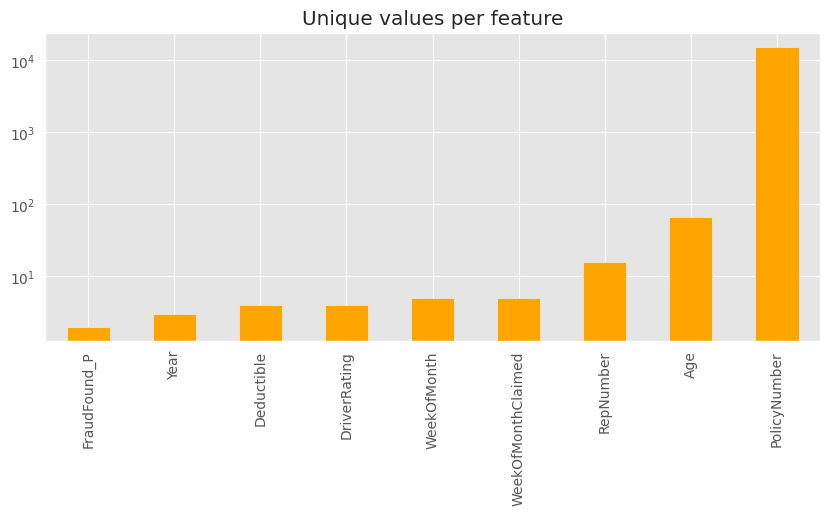

In [ ]:
# Find out the number of unique values of the categorical features
unique_values_cat = df.select_dtypes(
  include= "object").nunique().sort_values()

# Find out the number of unique values of the numerical features
unique_values_con = df.select_dtypes(
  include= "number").nunique().sort_values()

# Plot a countplot of the unique values per numerical feature
unique_values_con.plot.bar(logy=True, figsize=(10, 4),
                       title="Unique values per feature", color= 'orange')

<Axes: title={'center': 'Unique values per feature'}>

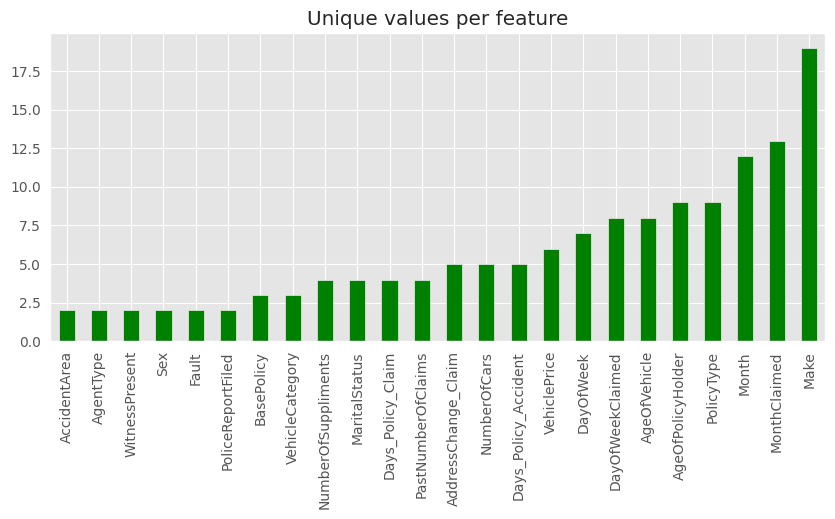

In [ ]:
# Plot a countplot of the unique values per categorical feature
unique_values_cat.plot.bar( figsize=(10, 4),
                       title="Unique values per feature", color= 'green')

#### (c) Investigate column Age for Age = 0

In [ ]:
# There a total of 320 rows with age = 0
df[df['Age'] ==0]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
13,Jan,5,Friday,Honda,Rural,Wednesday,Feb,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
28,Jul,1,Saturday,Honda,Urban,Tuesday,Sep,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils
31,Mar,1,Sunday,Honda,Urban,Tuesday,Mar,2,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
58,May,1,Monday,Honda,Rural,Wednesday,May,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Liability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15243,May,2,Tuesday,Honda,Urban,Monday,May,3,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Liability
15262,Mar,3,Monday,Honda,Urban,Thursday,Mar,3,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Liability
15274,Apr,3,Monday,Honda,Urban,Tuesday,May,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Collision
15379,Jan,2,Tuesday,Honda,Urban,Thursday,Jan,2,Male,Single,...,new,16 to 17,No,No,External,none,1 year,1 vehicle,1996,All Perils


In [ ]:
# Dive in deeper into age to look at the unique categories , realised that there is age 0 - which is illogical
df['Age'].unique()

array([21, 34, 47, 65, 27, 20, 36,  0, 30, 42, 71, 52, 28, 61, 38, 41, 32,
       40, 63, 31, 45, 60, 39, 55, 35, 44, 72, 29, 37, 59, 49, 50, 26, 48,
       64, 33, 74, 23, 25, 56, 16, 68, 18, 51, 22, 53, 46, 43, 57, 54, 69,
       67, 19, 78, 77, 75, 80, 58, 73, 24, 76, 62, 79, 70, 17, 66])

In [ ]:
# Find out what is the AgeOfPolicyHolder for those with Age = 0
df.loc[df ['Age']== 0, 'AgeOfPolicyHolder'].unique()

array(['16 to 17'], dtype=object)

All rows with Age = 0 has AgeofPolicyHolder = '16 to 17'. Therefore, we can choose to replace the 0 values in Age with the mean of the range '16 to 17'.

In [ ]:
# Find the average of the Age column
avr = round(df['Age'].mean(), 0)
# Replace all 0 values with the average age
df.loc[df['Age']==0, 'Age'] = avr

#### (d) Clean up columns - DayOfWeekClaimed and MonthClaimed

In [ ]:
df.loc[df['MonthClaimed']== '0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [ ]:
df.loc[df['DayOfWeekClaimed']== '0']


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


Row 1516 has 0 values for both 'MonthClaimed' and 'DayOfWeekClaimed'.Therefore, we proceed to drop this row from the dataset. Before we drop the row, let us check if this row is a fraud case or not.

In [ ]:
df.loc[1516, 'FraudFound_P']

0

Row 1516 is not a fraud case , which may be less valuable to us as it falls under the majority of the labels. Hence, we will drop row 1516.

In [ ]:
# Drop the column 1516
df.drop(1516, axis = 0, inplace = True)

# Reset index of the dataset after dropping row
df.reset_index(drop= True, inplace = True)

#### (e) Remove unncessary column - PolicyNumber

In [ ]:
# Check for duplication in policy number
df[df.duplicated(['PolicyNumber'])]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy


In [ ]:
# No duplicates - unique identifier , which is not nessasery for analyis --> drop the column
df.drop('PolicyNumber', axis = 1, inplace = True)

In [ ]:
#Check if there are still duplicate records after policy number is removed - if none, it means that every entry is a unique claim
df[df.duplicated()]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy


### 4. Exploratory Data Analysis

### Data Understanding/EDA

In [ ]:
# Check for columns in dataset
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'RepNumber', 'Deductible',
       'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [ ]:
# Group the categorical features and continuous features separately
categorical = []
continuous = []
for col in df.columns:
    if len(df[col].unique()) < 20:   # if the unque values of a feature is more than 20, group it as a categorical feature
        categorical.append(col)
    else:
        continuous.append(col)

print(categorical)
print(continuous)

['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'FraudFound_P', 'RepNumber', 'Deductible', 'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy']
['Age']


#### 1. How do the features vary for fraud cases ?

(a) Continuous Features

The only continuous feature in this dataset is Age. Thus, we will look at the distribution of Age and how it influences the fraud cases.



[Text(0.5, 1.0, 'Histogram of Age'), Text(0.5, 0, 'Age')]

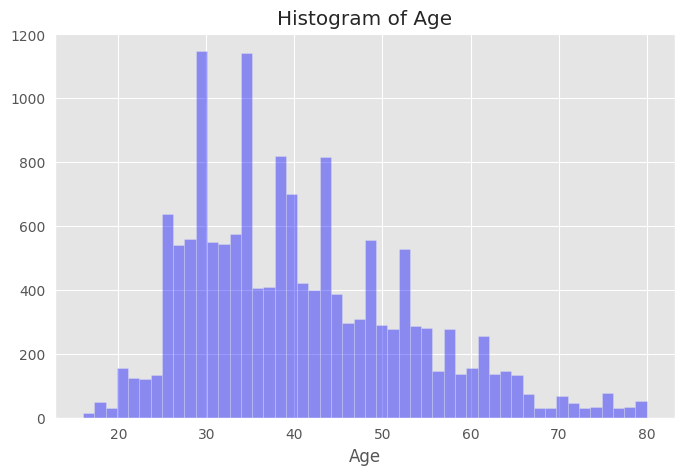

In [ ]:
# Create a histogram of the Age column to look at the distribution
fig, ax = plt.subplots(figsize = (8, 5))
sns.distplot(df['Age'], kde= False, bins = 50, ax = ax , color = 'Blue')
ax.set(title = 'Histogram of Age', xlabel = 'Age')

The column Age is slightly right-skewed , thus there is a need to do a log transformation on the column Age to get a normal distribution later on.

[Text(0.5, 1.0, 'Boxplot of Age'), Text(0.5, 0, 'Age')]

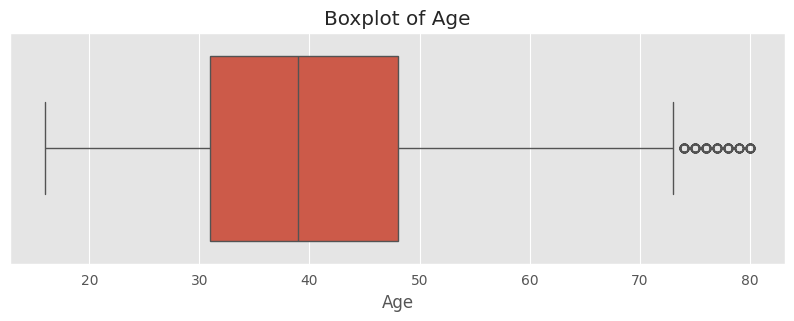

In [ ]:
# Create a box plot to check if there are any outliers
fig, ax = plt.subplots(figsize = (10,3))
sns.boxplot( x = 'Age', data = df, ax = ax)
ax.set(title = 'Boxplot of Age', xlabel = 'Age')

There are only a few outliers , and might not be significant enough to affect the dataset as a whole. Hence, we will go ahead to do a log transformation on the Age column later on to take care of the distribution instead of removing the outliers form the dataset.

In [ ]:
# Finding out the percentage of fraud cases in the dataset
(df['FraudFound_P'].value_counts(normalize = True))*100

,proportion
FraudFound_P,
0,94.01
1,5.99


In [ ]:
# Allocating fraud cases as sub-dataset called fraud
fraud = df.loc[df['FraudFound_P'] == 1]

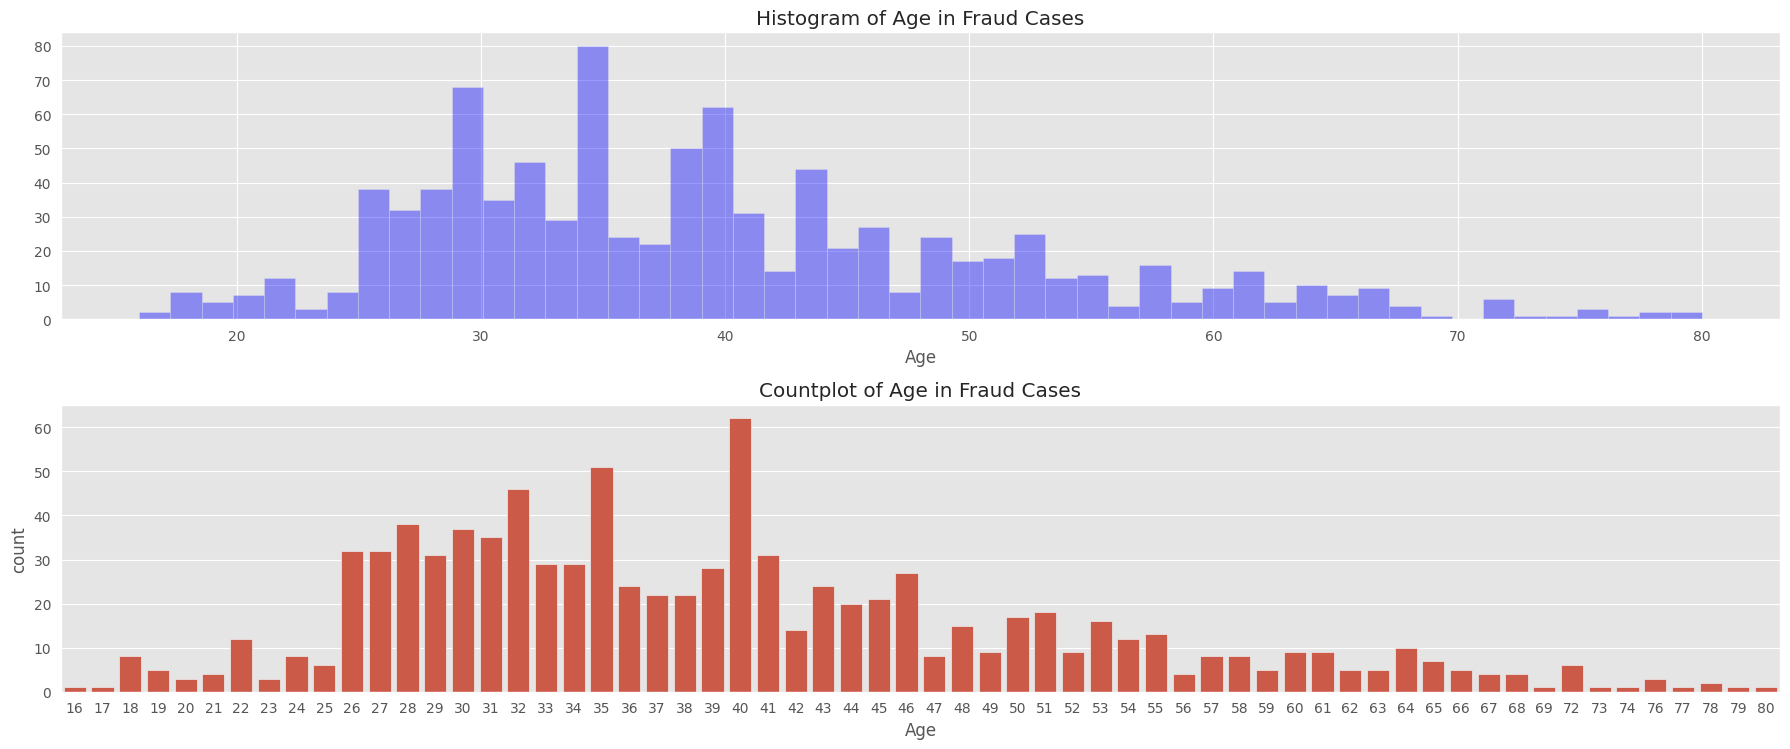

In [ ]:
# Create histogram of Age in fraud dataset
fig, (ax0, ax1) = plt.subplots(nrows = 2, ncols= 1, figsize = (18,8))
sns.distplot(fraud['Age'], kde= False, bins = 50, ax = ax0 , color = 'Blue')
# Create a countplot of Age in fraud cases
sns.countplot(x= 'Age', data = fraud, ax = ax1)
ax0.set(title = 'Histogram of Age in Fraud Cases', xlabel = 'Age')
ax1.set(title = 'Countplot of Age in Fraud Cases', xlabel = 'Age')
plt.tight_layout(rect=[0, 0.03, 1, 0.98])

The distribution of Age in Fraud dataset is also slightly right-skewed. In addition, most of the ages fall between 26 to 46 years old for fraud cases.

#### (b) Categorical features

In [ ]:
# Retrieve the list of categorical features
categorical

['Month',
 'WeekOfMonth',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'WeekOfMonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'FraudFound_P',
 'RepNumber',
 'Deductible',
 'DriverRating',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'Year',
 'BasePolicy']

As some of the columns are binary ( only 2 unique categories ) and some are multi-class ( more than 2 unique categories), we will proceed to separate the columns into 2 groups - Binary and multi-class , for better data visualisation and analysis.

In [ ]:
# Create a For loop through the Categorical list to separate the features into 2 groups - Binary and Multi-class
binary =[]
multi = []
for col in categorical:
    if len(df[col].unique()) < 3:   # Features with less than 2 unique values will be grouped as Binary
        binary.append(col)          # Features with more 2 unique values will be grouped as Multi-class
    else:
        multi.append(col)

print('Binary features:\n', binary,'\n')
print('Multi-cat features:\n', multi)

Binary features:
 ['AccidentArea', 'Sex', 'Fault', 'FraudFound_P', 'PoliceReportFiled', 'WitnessPresent', 'AgentType'] 

Multi-cat features:
 ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'MaritalStatus', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'RepNumber', 'Deductible', 'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy']


In [ ]:
# As there are features which depict time e.g month, week, these features will be further grouped as time features.
time_features = ['Month', 'WeekOfMonth',
 'DayOfWeek','DayOfWeekClaimed',
 'MonthClaimed',
 'WeekOfMonthClaimed']
time_features

['Month',
 'WeekOfMonth',
 'DayOfWeek',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'WeekOfMonthClaimed']

In [ ]:
# The rest of the features will be grouped as Rest
rest = []
for i in multi:
    if i not in time_features:
        rest.append(i)

rest

['Make',
 'MaritalStatus',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'RepNumber',
 'Deductible',
 'DriverRating',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'Year',
 'BasePolicy']

Time Features

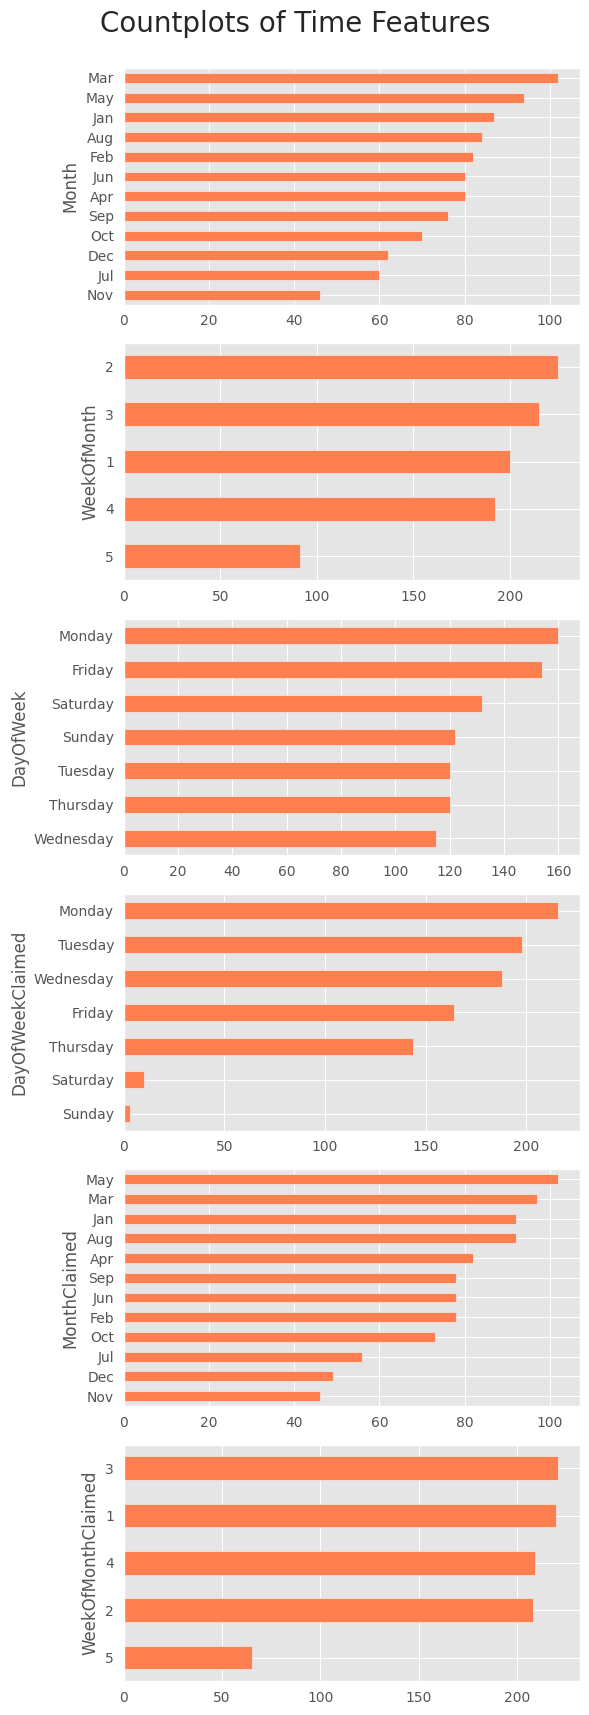

In [ ]:
# Create a For loop to visualise barplots for all time features
n=len(time_features)
fig,ax = plt.subplots(n ,1, figsize=(6,n*3))

for i in range(n):
    plt.sca(ax[i])  #Set the current Axes to ax and the current Figure to the parent of ax
    col = time_features[i]
    fraud.groupby(col)[col].count().sort_values().plot(kind= 'barh', color= '#FF7F50')
    fig.suptitle ('Countplots of Time Features', fontsize = 20)

    fig.tight_layout(rect=[0, 0.03, 1, 0.98])

Binary Features


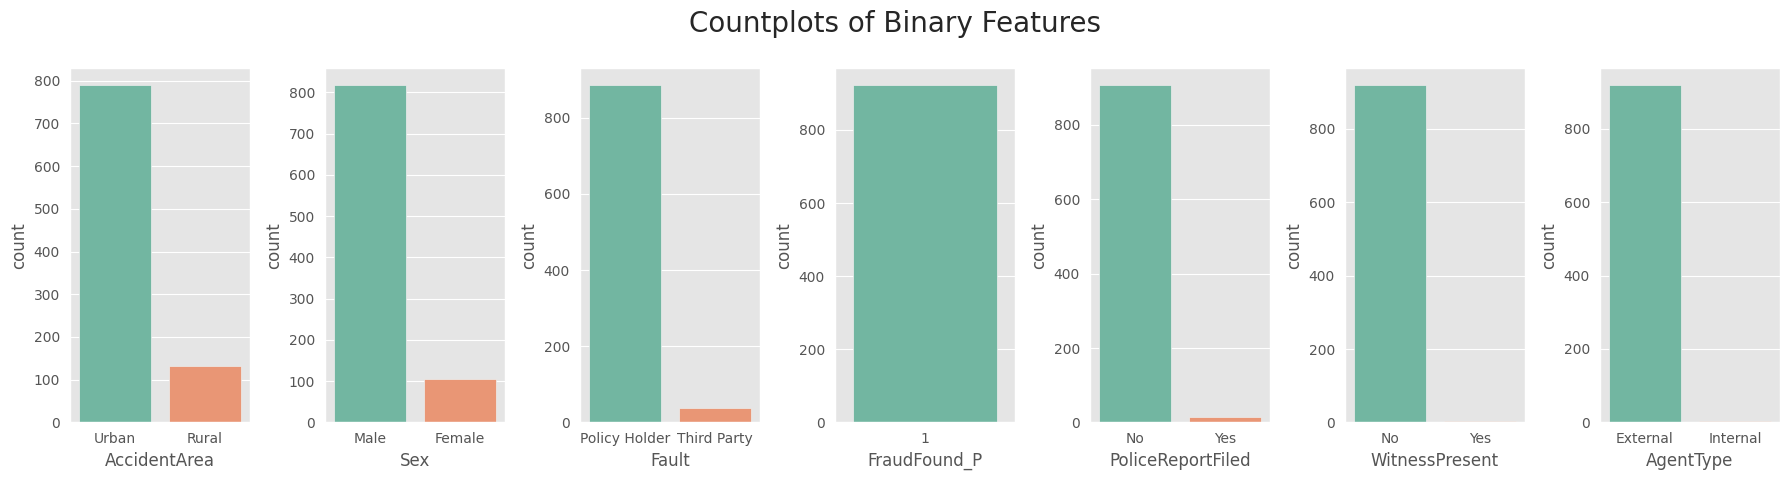

In [ ]:
# Create a For loop to visualise countplots for all binary features
n=len(binary)
fig,ax = plt.subplots(1 ,n, figsize=(18, 5))

for i in range(n):
    plt.sca(ax[i])  #Set the current Axes to ax and the current Figure to the parent of ax
    col = binary[i]
    sns.countplot(x=col, data=fraud, palette = 'Set2')

    fig.suptitle ('Countplots of Binary Features', fontsize = 20)

    plt.tight_layout(rect=[0, 0.03, 1, 0.98])

Multi-Class Features


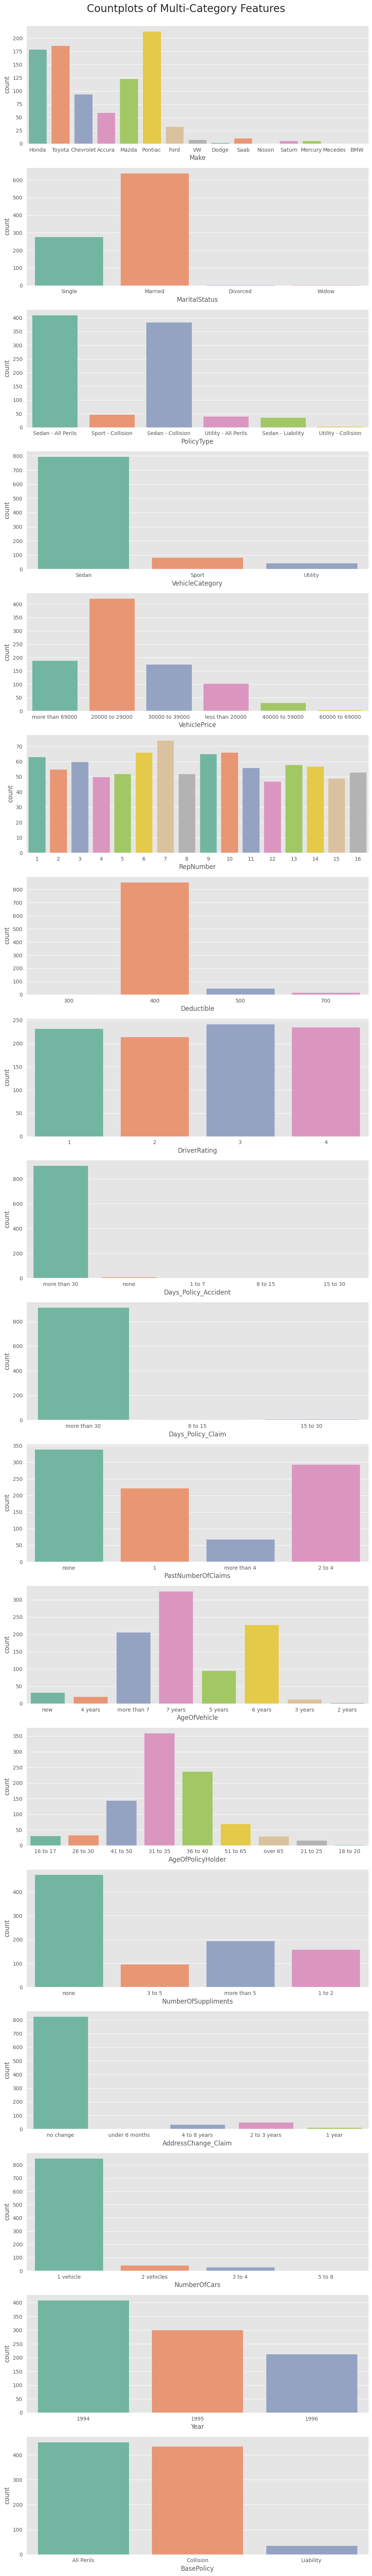

In [ ]:
# Create a For loop to visualise countplots for all multi-class features
n=len(rest)
fig,ax = plt.subplots(n ,1, figsize=(10,n*4))

for i in range(n):
    plt.sca(ax[i])  #Set the current Axes to ax and the current Figure to the parent of ax
    col = rest[i]
    sns.countplot(x=col, data=fraud, palette = 'Set2')

    fig.suptitle ('Countplots of Multi-Category Features', fontsize = 20)

    plt.tight_layout(rect=[0, 0.03, 1, 0.98])

#### (c) Multivariate Data Exploration

Exploring the demographics for decreasing fraud trend from 1994 to 1996.

[Text(0.5, 1.0, 'Boxplots of Ages across Marital Status')]

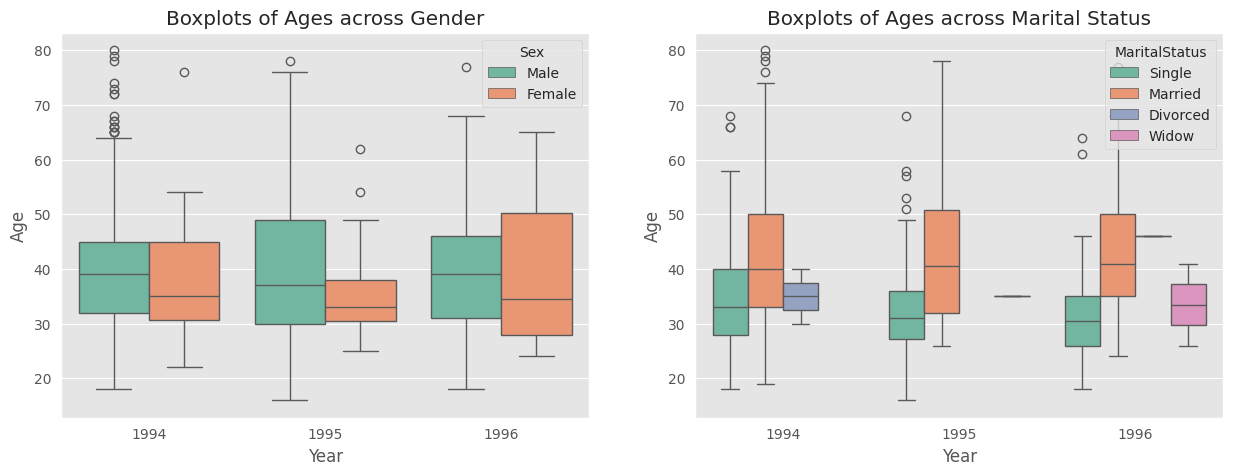

In [ ]:
#Create boxplots to visualise gender and marital status acorss ages
fig,(ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot (y = 'Age', x = 'Year', data= fraud, palette = 'Set2', hue= 'Sex', ax= ax0)
sns.boxplot (y = 'Age', x = 'Year', data= fraud, palette = 'Set2', hue= 'MaritalStatus', ax= ax1)
ax0.set(title = 'Boxplots of Ages across Gender')
ax1.set(title = 'Boxplots of Ages across Marital Status')

[Text(0.5, 1.0, 'Countplot of Fraud Cases across Policy Holder Ages from 1994-1996')]

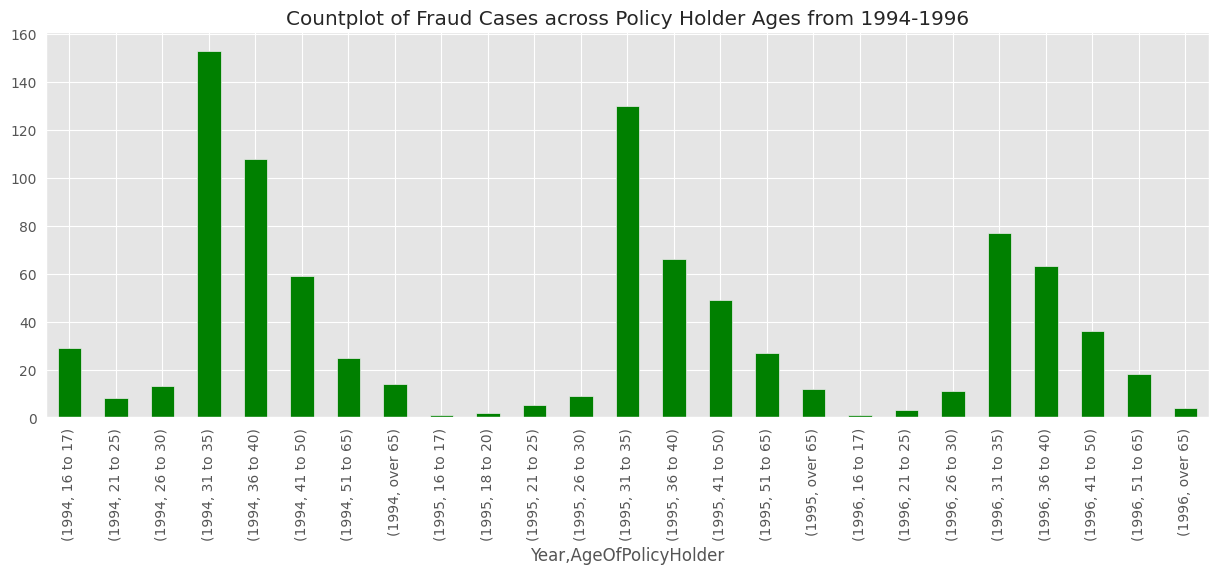

In [ ]:
# Create a countplot to visualise the fraud cases across age groups of policy holder over the years
fig,(ax) = plt.subplots(figsize=(15, 5))
fraud.groupby(['Year','AgeOfPolicyHolder'])['Year'].count().plot(kind= 'bar', ax = ax, color = 'g')
ax.set(title = 'Countplot of Fraud Cases across Policy Holder Ages from 1994-1996')

The fraud cases across the age groups of policy holders all decrease over the years. The decreasing pattern is the same across all years.

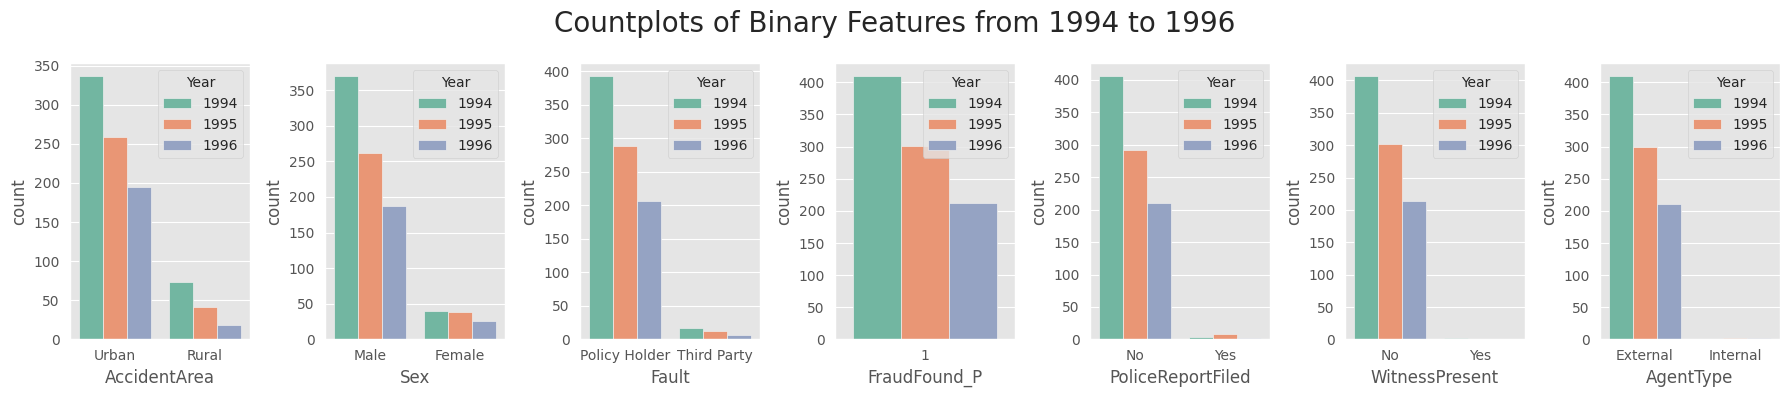

In [ ]:
# Create countplots to show the trend of binary features across the years
n=len(binary)
fig,ax = plt.subplots(1 ,n, figsize=(18,4))

for i in range(n):
    plt.sca(ax[i])
    col = binary[i]
    sns.countplot(x=col, data=fraud, palette = 'Set2', hue='Year')

    fig.suptitle ('Countplots of Binary Features from 1994 to 1996', fontsize = 20)

    plt.tight_layout()

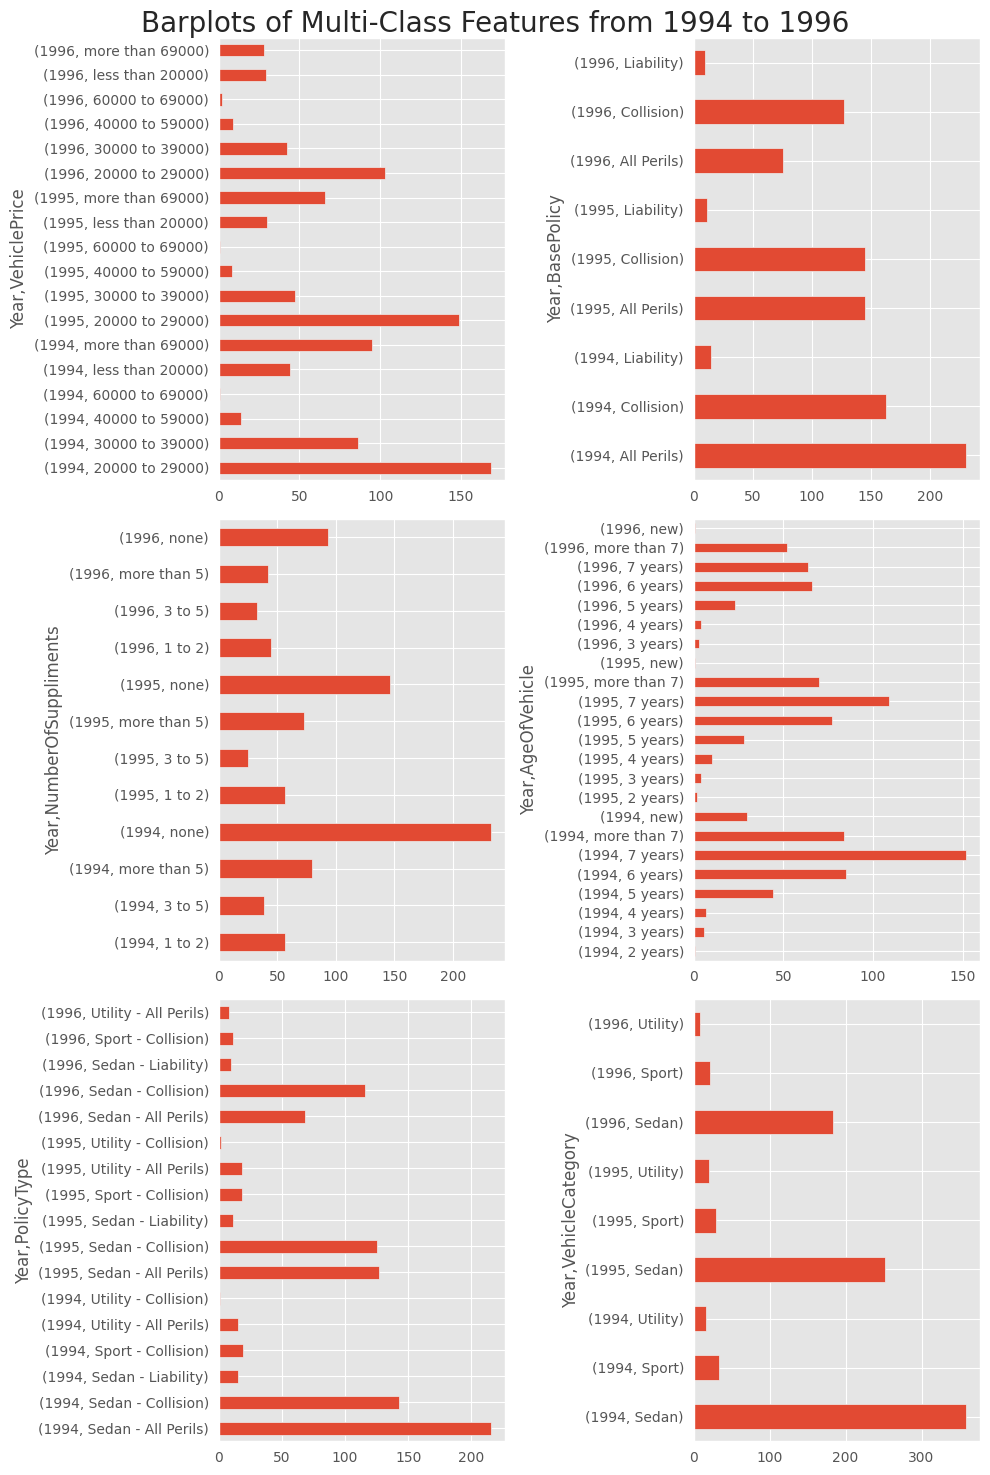

In [ ]:
# Create bar plots for some interesting multi-class features across the years
fig, [[ax0, ax1], [ax2, ax3], [ax4, ax5]] = plt.subplots(nrows = 3, ncols = 2, figsize = (10,15))
fraud.groupby(['Year', 'VehiclePrice'])['Year'].count().plot(kind= 'barh', ax = ax0)
fraud.groupby(['Year', 'BasePolicy'])['Year'].count().plot(kind= 'barh', ax = ax1)
fraud.groupby(['Year', 'NumberOfSuppliments'])['Year'].count().plot(kind= 'barh', ax = ax2)
fraud.groupby(['Year', 'AgeOfVehicle'])['Year'].count().plot(kind= 'barh', ax = ax3)
fraud.groupby(['Year', 'PolicyType'])['Year'].count().plot(kind= 'barh', ax = ax4)
fraud.groupby(['Year', 'VehicleCategory'])['Year'].count().plot(kind= 'barh', ax = ax5)
fig.suptitle ('Barplots of Multi-Class Features from 1994 to 1996', fontsize = 20)

plt.tight_layout()

From the countplots above, the other features did not show much unusual changes or trends along the years. Overall as a whole, there was a decreasing trend in all features, which corresponds to the decreasing fraud trend along the years.

2. As most of the vehicles involved in fraud were priced from 20000 -
29000 and mostly Sedan, what were the demographics for this group of
policyholders?

In [ ]:
# Create a sub-dataset containing only sedan priced at $20000- $29000
popcat= fraud.loc[(fraud['VehiclePrice'].isin(['20000 to 29000'])& fraud['VehicleCategory'].isin(['Sedan'])), :]

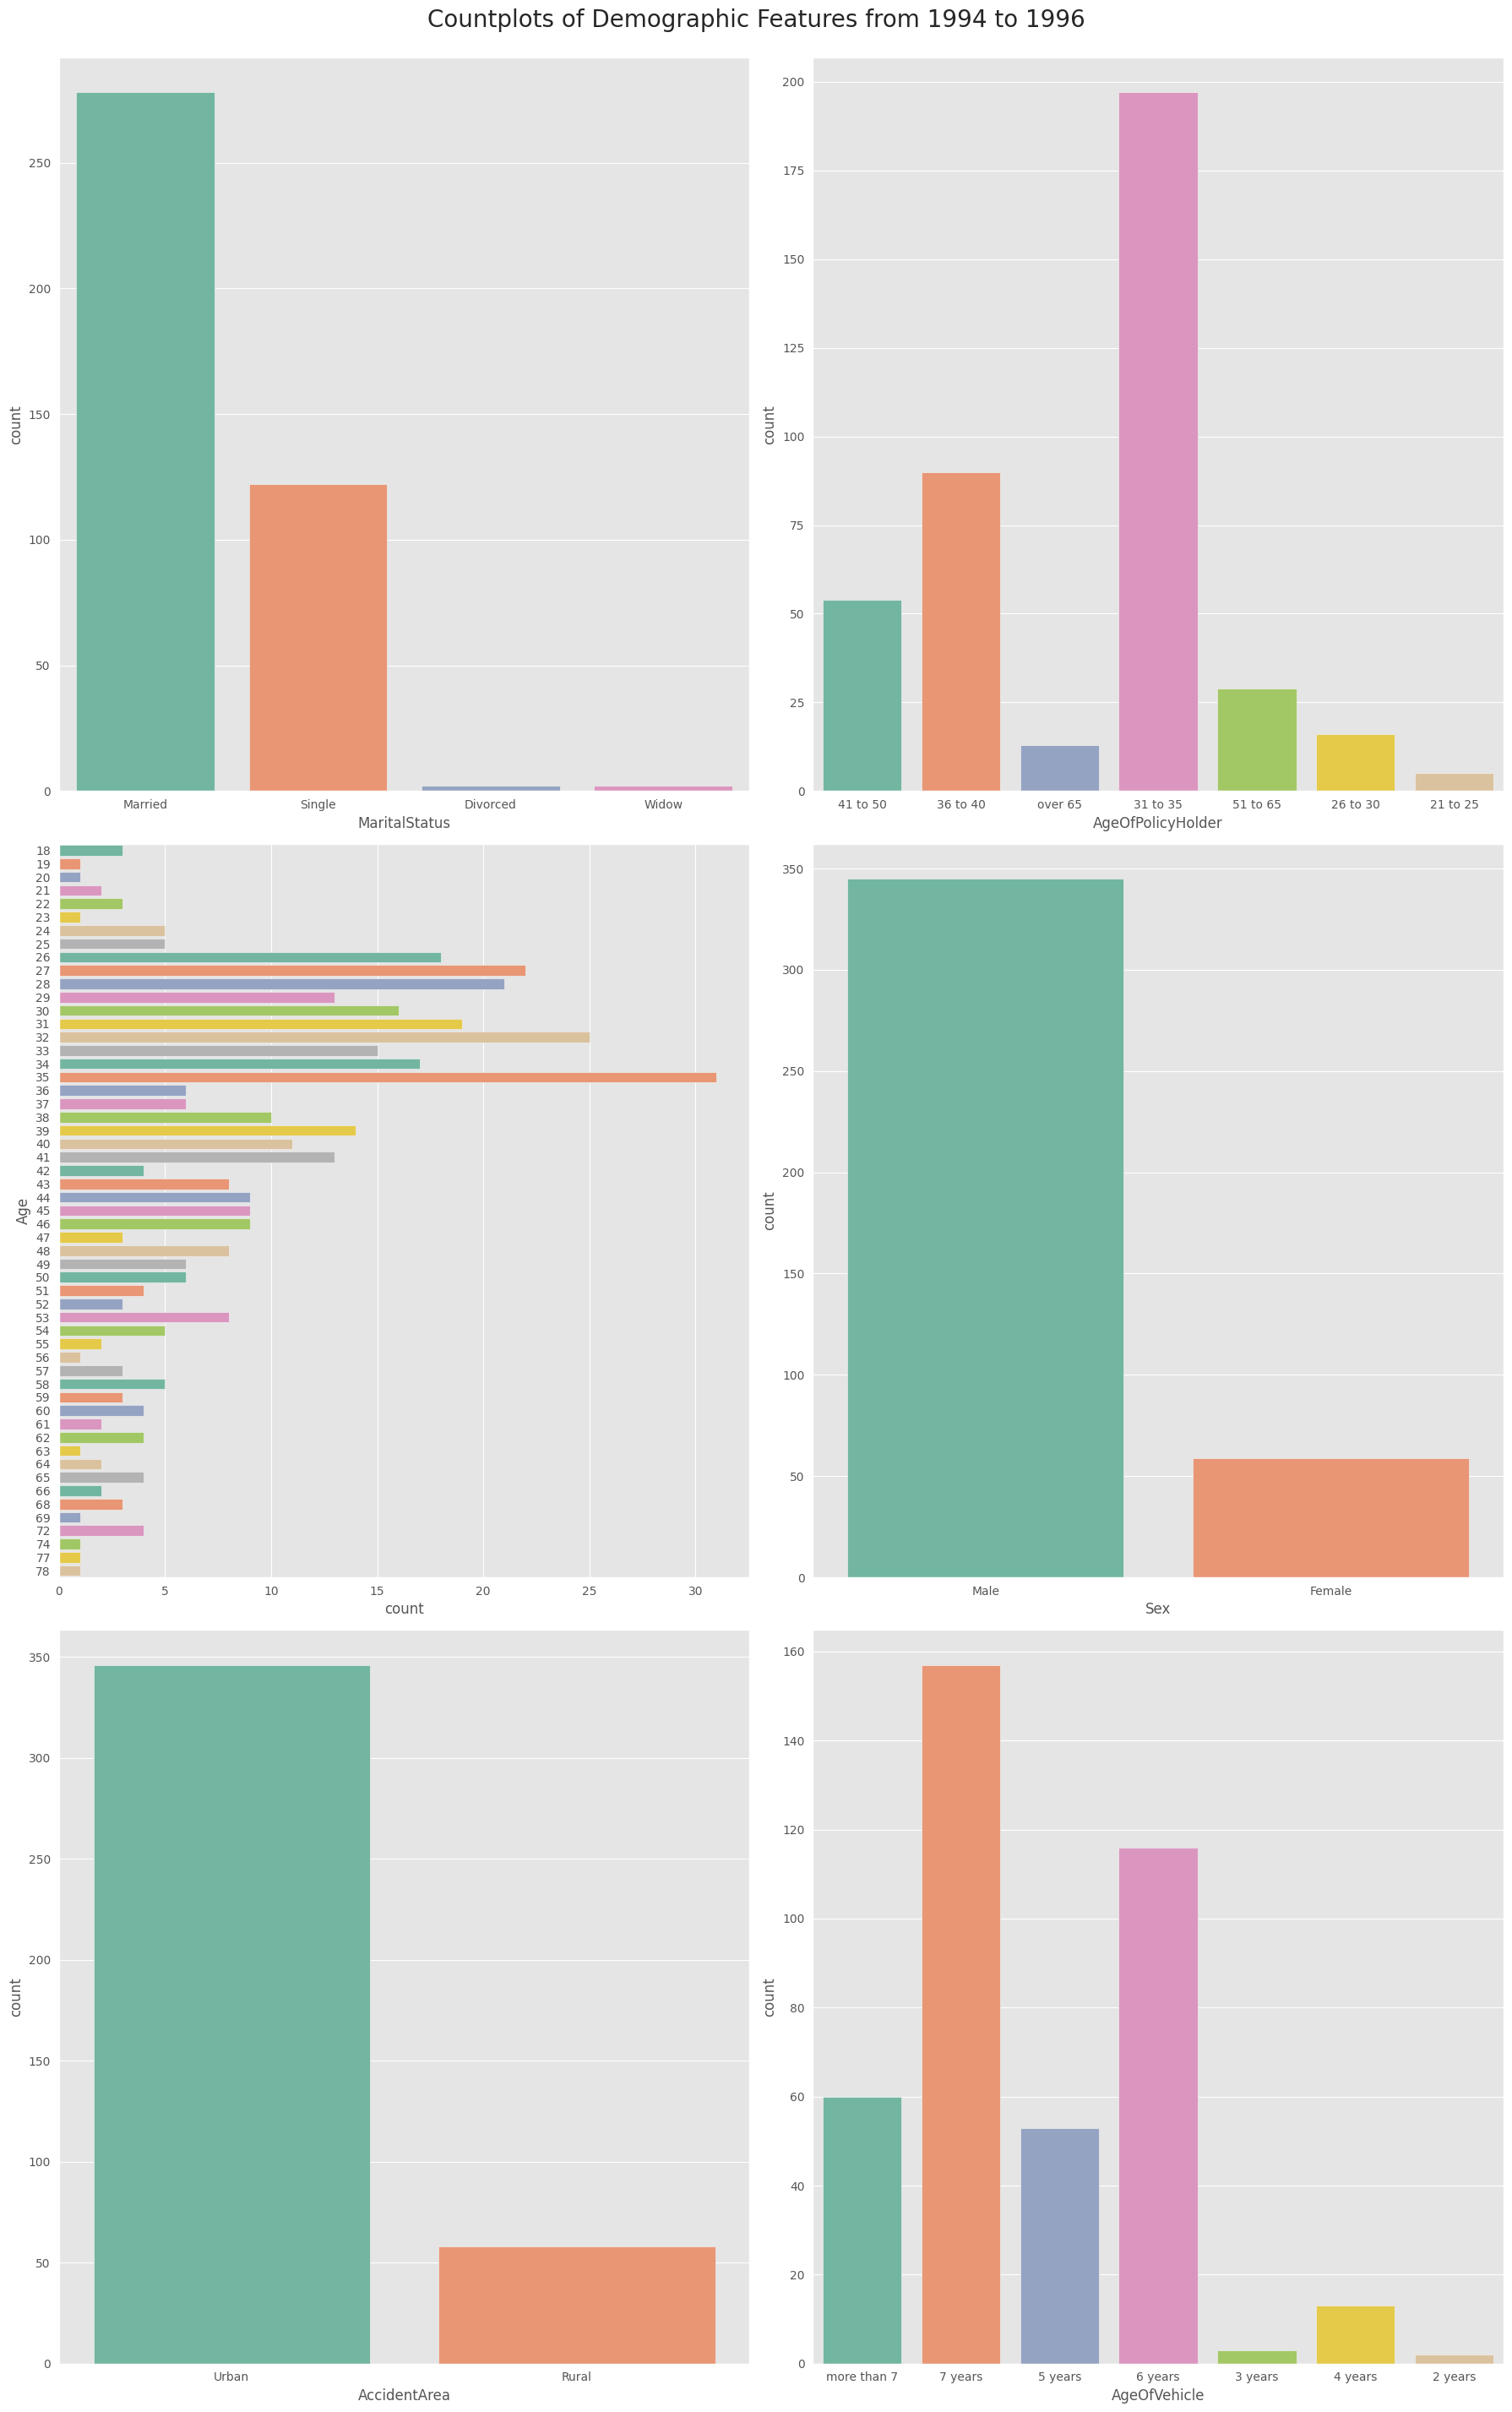

In [ ]:
# Create countplots to show how the demographic features vary for the group in dataframe popcat
fig, [[ax0, ax1], [ax2, ax3], [ax4, ax5]] = plt.subplots(nrows = 3, ncols = 2, figsize = (18,30))
sns.countplot(x = 'MaritalStatus', data = popcat, palette= 'Set2', ax=ax0)
sns.countplot(x = 'AgeOfPolicyHolder', data = popcat, palette= 'Set2', ax= ax1)
sns.countplot(y = 'Age', data = popcat, palette= 'Set2', ax= ax2)
sns.countplot(x = 'Sex', data = popcat, palette= 'Set2', ax = ax3)
sns.countplot(x = 'AccidentArea', data = popcat, palette= 'Set2', ax = ax4)
sns.countplot(x = 'AgeOfVehicle', data = popcat, palette= 'Set2', ax = ax5)

fig.suptitle ('Countplots of Demographic Features from 1994 to 1996', fontsize = 20)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])

3. For the common car models in fraud cases, what were the demographics like? (e.g Age group, Marital Status)

For this part, we will only be exploring the top 3 car models involved in fraud cases - Pontiac, Honda and Toyota.



In [ ]:
# Create a sub-dataset which consists only fraud cases involving car models - Pontiac, Honda and Toyata
pop_car= fraud.loc[fraud['Make'].isin(['Pontiac', 'Honda', 'Toyota']), :]

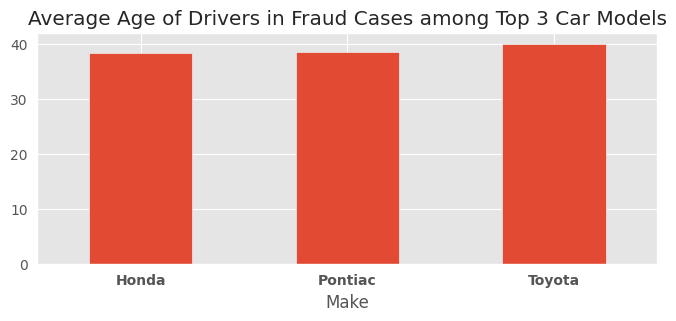

In [ ]:

# To find out the average age of the drivers for these 3 models
fig,(ax) = plt.subplots(figsize=(8, 3))
pop_car.groupby(['Make'])['Age'].mean().plot(kind='bar').set(title= 'Average Age of Drivers in Fraud Cases among Top 3 Car Models')
plt.xticks(fontsize=10,fontweight='bold',rotation=0);

The average age of drivers in fraud cases involving the top 3 models is around 38 to 40 years old.

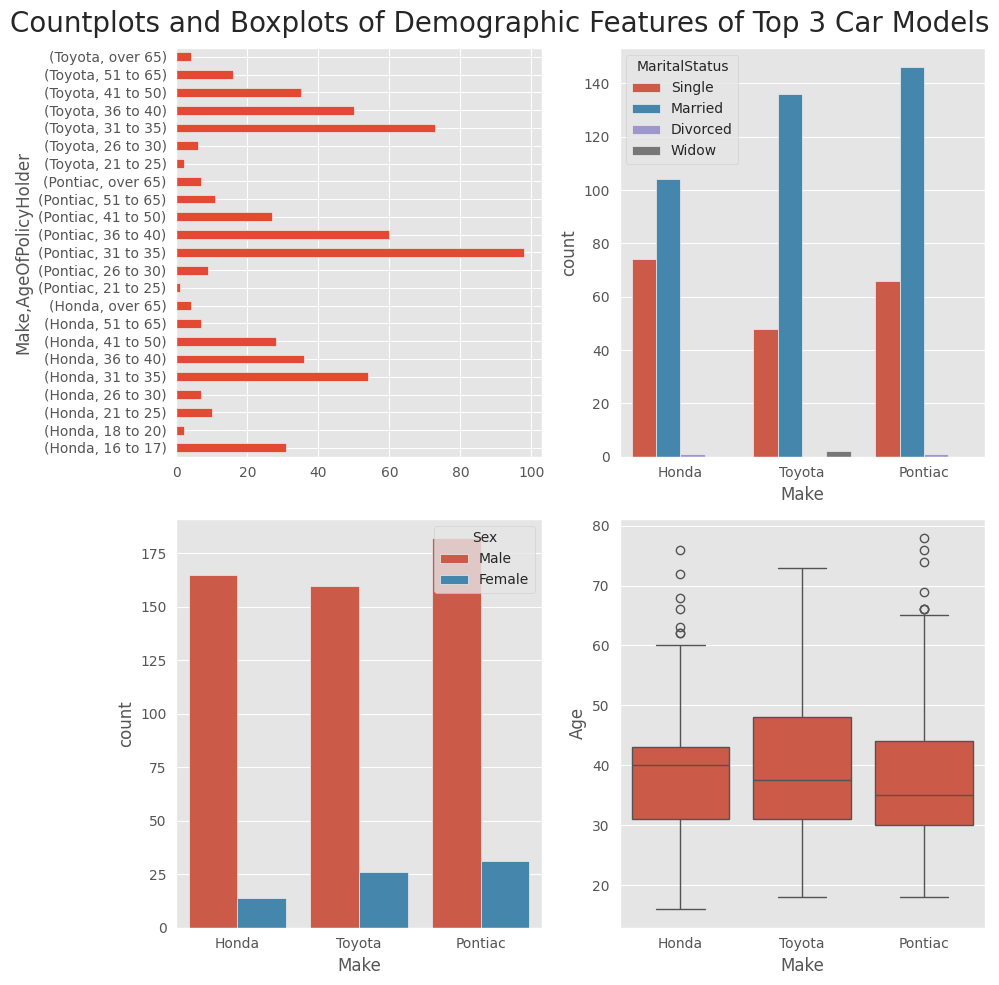

In [ ]:
# Let us look at the Age of policy holder, Marital Status, Gender and Age.

fig,([ax0, ax1], [ax2, ax3]) = plt.subplots(2, 2,figsize=(10, 10))
pop_car.groupby(['Make', 'AgeOfPolicyHolder'])['AgeOfPolicyHolder'].count().plot(kind='barh', ax= ax0)
sns.countplot(x= 'Make', data = pop_car, ax = ax1, hue = 'MaritalStatus')
sns.countplot(x= 'Make', data = pop_car, ax = ax2, hue = 'Sex')
sns.boxplot(x= 'Make', y= 'Age', data= pop_car, ax = ax3)

fig.suptitle ('Countplots and Boxplots of Demographic Features of Top 3 Car Models', fontsize = 20)

plt.tight_layout()

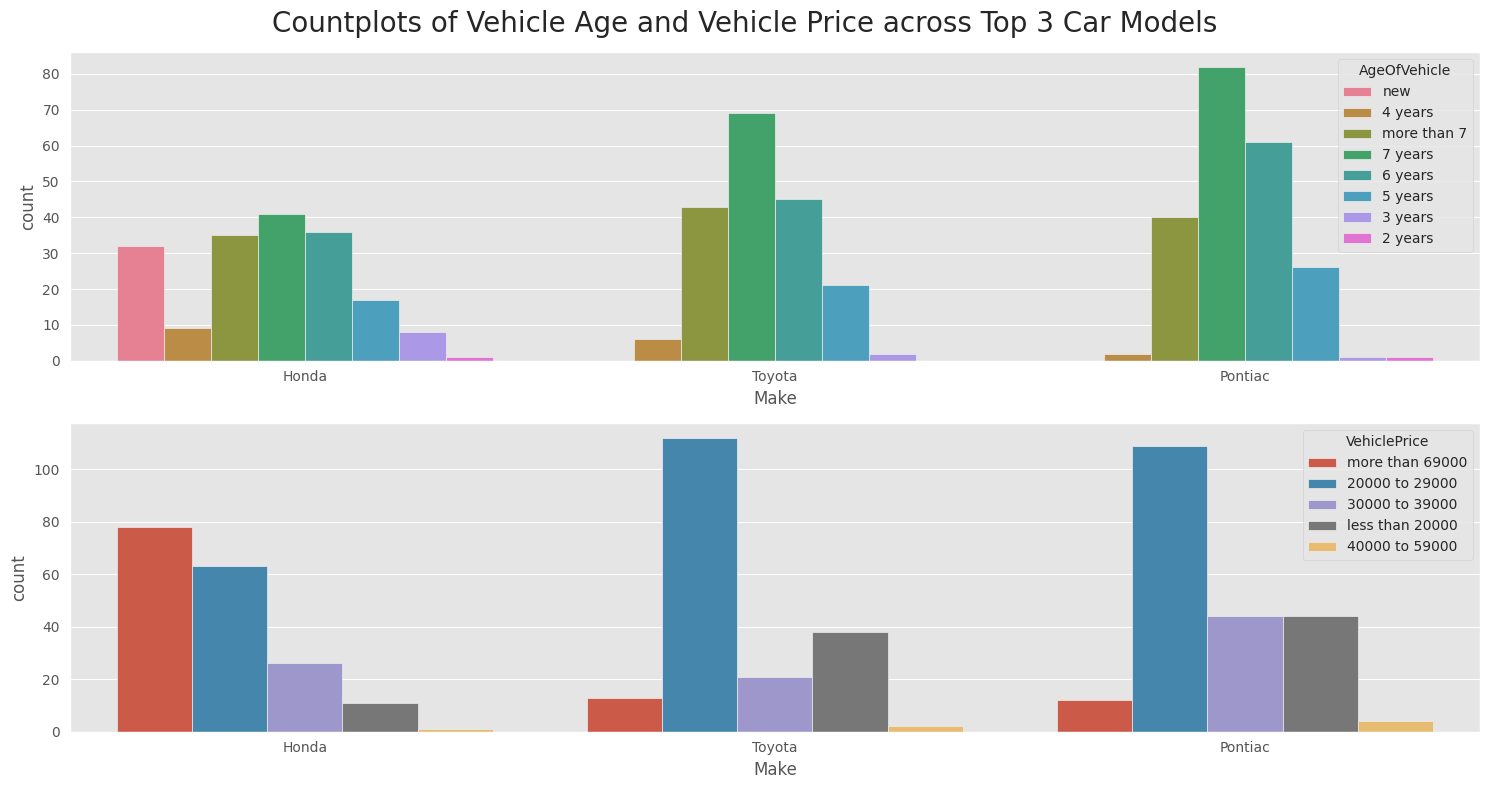

In [ ]:
# Create countplots to show how Vehicle Age and Vehicle Price vary across the 3 models
fig,(ax1, ax2) = plt.subplots(2,1, figsize=(15, 8))
sns.countplot(x='Make', data= pop_car,hue = 'AgeOfVehicle', ax = ax1)
sns.countplot(x='Make', data= pop_car,hue = 'VehiclePrice', ax = ax2)
fig.suptitle ('Countplots of Vehicle Age and Vehicle Price across Top 3 Car Models', fontsize = 20)

plt.tight_layout()

In [ ]:
fraud.loc[fraud['VehiclePrice'].isin(['more than 69000']) & fraud['AgeOfVehicle'].isin(['new']), 'Make'].value_counts()


,count
Make,
Honda,32


Indeed, all brand new cars priced over $69000 were of Honda model. This indicates that more investigation is needed for Honda cars and its related insurance policies and regulations.

4. Other Interesting Observations involving demographics and the other features


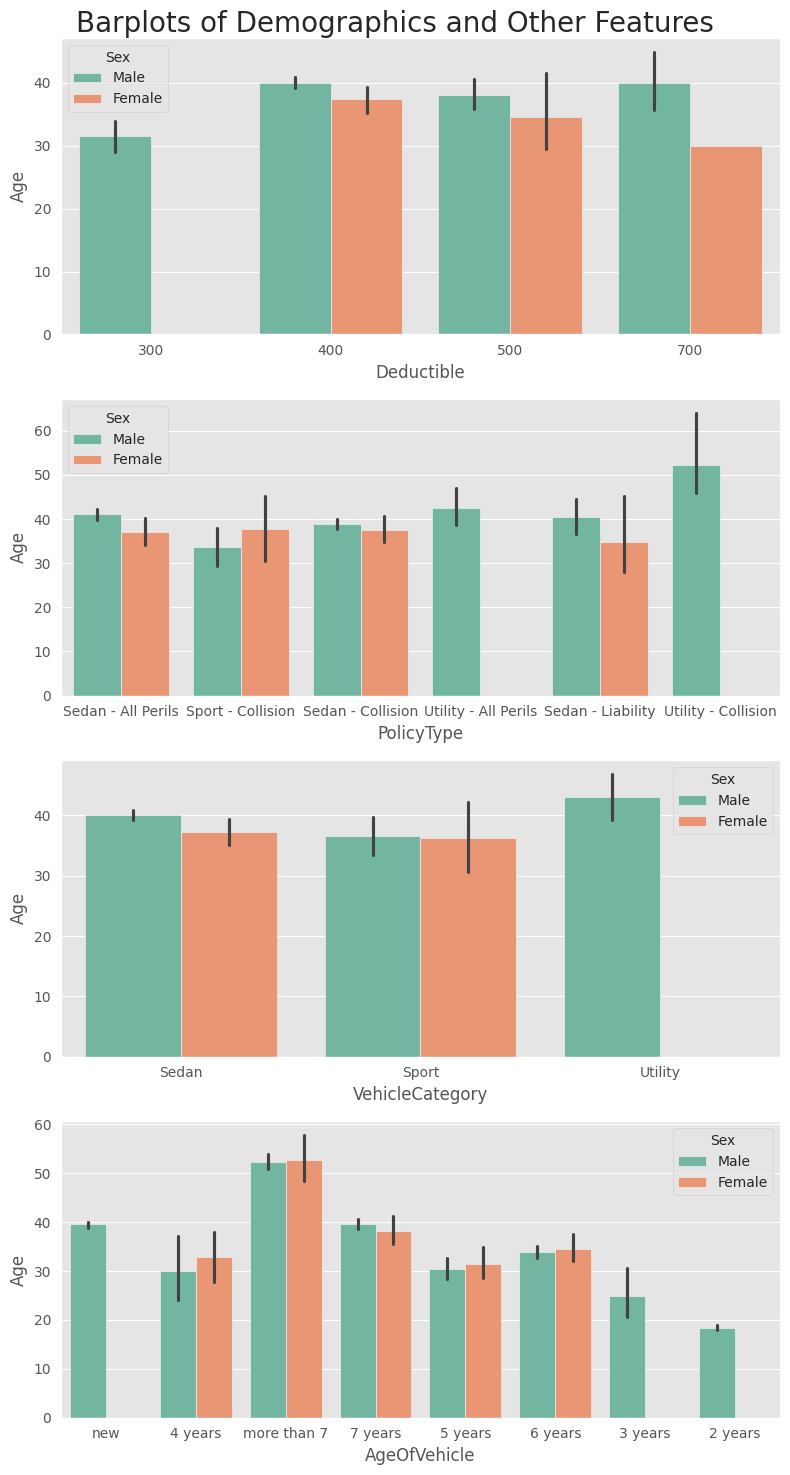

In [ ]:
# Create a For Loop to plot barplots to show how gender and age varies across Deductible, Policy Type, Vehicle Category and Vehicle Age
interesting_feat= ['Deductible', 'PolicyType','VehicleCategory', 'AgeOfVehicle' ]
n=len(interesting_feat)
fig,ax = plt.subplots(n ,1, figsize=(8,15))

for i in range(n):
    plt.sca(ax[i])
    col = interesting_feat[i]
    sns.barplot(x=col, y= 'Age', data= fraud, hue= 'Sex',palette = 'Set2')

    fig.suptitle ('Barplots of Demographics and Other Features', fontsize = 20)

    plt.tight_layout()

### 5. Data Pre-Processing and Feature Engineering

Clean up column 'PolicyType'

As Policy Type and Base Policy consist of repetitive information, we will remove the policy information under Policy Type


In [ ]:
df['PolicyType'].value_counts()


,count
PolicyType,
Sedan - Collision,5584
Sedan - Liability,4987
Sedan - All Perils,4086
Sport - Collision,348
Utility - All Perils,340
Utility - Collision,30
Sport - All Perils,22
Utility - Liability,21
Sport - Liability,1


In [ ]:
# Create a function to remove the policy information
def ptconvert(data):
    data = data.split()
    for i in data:
        pt = data[0]
        return pt

In [ ]:
df['PolicyType'] = df['PolicyType'].astype(str).apply(ptconvert)

In [ ]:
df['PolicyType'].unique()

array(['Sport', 'Sedan', 'Utility'], dtype=object)

Binning for selected features
Make
Marital Status
Days_Policy_Accident
Days_Policy_Claim
AddressChange_Claim
NumberOfCars

1. Make

2. MaritalStatus

3. Days_Policy_Accident

4. Days_Policy_Claim

5. AddressChange_Claim

6. NumberOfCars

In [ ]:
df['Year'].unique()


array([1994, 1995, 1996])

In [ ]:
# Bin NumberOfCars - more than 1 vehicle as 'Others'
# df.loc[~df['NumberOfCars'].isin(['1 vehicle']), 'NumberOfCars'] = 'Others'

In [ ]:
# df['NumberOfCars'].unique()

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15419 non-null  object
 1   WeekOfMonth           15419 non-null  int64 
 2   DayOfWeek             15419 non-null  object
 3   Make                  15419 non-null  object
 4   AccidentArea          15419 non-null  object
 5   DayOfWeekClaimed      15419 non-null  object
 6   MonthClaimed          15419 non-null  object
 7   WeekOfMonthClaimed    15419 non-null  int64 
 8   Sex                   15419 non-null  object
 9   MaritalStatus         15419 non-null  object
 10  Age                   15419 non-null  int64 
 11  Fault                 15419 non-null  object
 12  PolicyType            15419 non-null  object
 13  VehicleCategory       15419 non-null  object
 14  VehiclePrice          15419 non-null  object
 15  FraudFound_P          15419 non-null

In [ ]:
to_str = ['WeekOfMonth', 'WeekOfMonthClaimed','RepNumber', 'Deductible', 'DriverRating', 'Year']


In [ ]:
# For Loop to convert the date type to string
for i in to_str:
    df[i]= df[i].astype('str')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15419 non-null  object
 1   WeekOfMonth           15419 non-null  object
 2   DayOfWeek             15419 non-null  object
 3   Make                  15419 non-null  object
 4   AccidentArea          15419 non-null  object
 5   DayOfWeekClaimed      15419 non-null  object
 6   MonthClaimed          15419 non-null  object
 7   WeekOfMonthClaimed    15419 non-null  object
 8   Sex                   15419 non-null  object
 9   MaritalStatus         15419 non-null  object
 10  Age                   15419 non-null  int64 
 11  Fault                 15419 non-null  object
 12  PolicyType            15419 non-null  object
 13  VehicleCategory       15419 non-null  object
 14  VehiclePrice          15419 non-null  object
 15  FraudFound_P          15419 non-null

#### Get_dummies Encoding

#### Ordinal Encoding

#### Frequency Encoding

In [ ]:
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15414,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15415,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15416,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15417,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


#### Log Transformation for Age


In [ ]:
# Final check to see if all the features are in integer or float datatypes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15419 non-null  object
 1   WeekOfMonth           15419 non-null  object
 2   DayOfWeek             15419 non-null  object
 3   Make                  15419 non-null  object
 4   AccidentArea          15419 non-null  object
 5   DayOfWeekClaimed      15419 non-null  object
 6   MonthClaimed          15419 non-null  object
 7   WeekOfMonthClaimed    15419 non-null  object
 8   Sex                   15419 non-null  object
 9   MaritalStatus         15419 non-null  object
 10  Age                   15419 non-null  int64 
 11  Fault                 15419 non-null  object
 12  PolicyType            15419 non-null  object
 13  VehicleCategory       15419 non-null  object
 14  VehiclePrice          15419 non-null  object
 15  FraudFound_P          15419 non-null

In [ ]:
df.head()


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15419 non-null  object
 1   WeekOfMonth           15419 non-null  object
 2   DayOfWeek             15419 non-null  object
 3   Make                  15419 non-null  object
 4   AccidentArea          15419 non-null  object
 5   DayOfWeekClaimed      15419 non-null  object
 6   MonthClaimed          15419 non-null  object
 7   WeekOfMonthClaimed    15419 non-null  object
 8   Sex                   15419 non-null  object
 9   MaritalStatus         15419 non-null  object
 10  Age                   15419 non-null  int64 
 11  Fault                 15419 non-null  object
 12  PolicyType            15419 non-null  object
 13  VehicleCategory       15419 non-null  object
 14  VehiclePrice          15419 non-null  object
 15  FraudFound_P          15419 non-null

In [ ]:
df.VehiclePrice.unique()

array(['more than 69000', '20000 to 29000', '30000 to 39000',
       'less than 20000', '40000 to 59000', '60000 to 69000'],
      dtype=object)

#### Label Encoding

In [ ]:
# Columns to convert
columns_to_convert = ['RepNumber', 'Deductible']

for col in columns_to_convert:
    # Convert to numeric, replacing invalid values with NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Keep a copy of the original DataFrame with the categorical columns
df_categorical = df[['AccidentArea', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'Make','DriverRating',
                     'Days_Policy_Accident', 'Days_Policy_Claim', 'PoliceReportFiled', 'WitnessPresent','VehiclePrice',
                     'AgentType', 'AddressChange_Claim', 'PastNumberOfClaims','NumberOfSuppliments','NumberOfCars', 'Year', 'BasePolicy', 'Month', 'AgeOfVehicle','AgeOfPolicyHolder']].copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()


# Apply LabelEncoder to each categorical column
for column in df_categorical.columns:
    df_categorical[column] = label_encoder.fit_transform(df_categorical[column])

# Concatenate the label encoded DataFrame with the original numerical columns
df_final = pd.concat([df_categorical, df.select_dtypes(exclude=['object'])], axis=1)

# Final check to see if all the features are in integer or float datatypes after encoding
print(df_final.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   AccidentArea          15419 non-null  int64
 1   Sex                   15419 non-null  int64
 2   MaritalStatus         15419 non-null  int64
 3   Fault                 15419 non-null  int64
 4   PolicyType            15419 non-null  int64
 5   VehicleCategory       15419 non-null  int64
 6   Make                  15419 non-null  int64
 7   DriverRating          15419 non-null  int64
 8   Days_Policy_Accident  15419 non-null  int64
 9   Days_Policy_Claim     15419 non-null  int64
 10  PoliceReportFiled     15419 non-null  int64
 11  WitnessPresent        15419 non-null  int64
 12  VehiclePrice          15419 non-null  int64
 13  AgentType             15419 non-null  int64
 14  AddressChange_Claim   15419 non-null  int64
 15  PastNumberOfClaims    15419 non-null  int64
 16  Numb

In [ ]:
df_final.columns

Index(['AccidentArea', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'Make', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PoliceReportFiled', 'WitnessPresent',
       'VehiclePrice', 'AgentType', 'AddressChange_Claim',
       'PastNumberOfClaims', 'NumberOfSuppliments', 'NumberOfCars', 'Year',
       'BasePolicy', 'Month', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'Age',
       'FraudFound_P', 'RepNumber', 'Deductible'],
      dtype='object')

In [ ]:
df_final.head()

,AccidentArea,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,Make,DriverRating,Days_Policy_Accident,Days_Policy_Claim,...,NumberOfCars,Year,BasePolicy,Month,AgeOfVehicle,AgeOfPolicyHolder,Age,FraudFound_P,RepNumber,Deductible
0,1,0,2,0,1,1,6,0,3,2,...,2,0,2,2,1,3,21,0,12,300
1,1,1,2,0,1,1,6,3,3,2,...,0,0,1,4,4,4,34,0,15,400
2,1,1,1,0,1,1,6,2,3,2,...,0,0,1,10,5,6,47,0,7,400
3,0,1,1,1,0,1,17,1,3,2,...,0,0,2,6,6,7,65,0,4,400
4,1,0,2,1,1,1,6,0,3,2,...,0,0,1,4,3,4,27,0,3,400


Dataset is pre-processed and now ready for machine learning. The dataset is export out as a csv for usage in machine learning.



In [ ]:
df_final.to_csv('ML_preprocessed.csv')

### 6. Model Training

In this section, we will train the dataset using several classification algorithms:

Logistic Regression,
K-Nearest Neighbour,
Random Forest,
XGBoost

The best model that suits the business problem based on the metrics - Recall, ROC AUC and Precision-Recall Curve will be selected for hyperparameter tuning.

We will adjust the class weights to deal with this set of imbalanced dataset.

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   AccidentArea          15419 non-null  int64
 1   Sex                   15419 non-null  int64
 2   MaritalStatus         15419 non-null  int64
 3   Fault                 15419 non-null  int64
 4   PolicyType            15419 non-null  int64
 5   VehicleCategory       15419 non-null  int64
 6   Make                  15419 non-null  int64
 7   DriverRating          15419 non-null  int64
 8   Days_Policy_Accident  15419 non-null  int64
 9   Days_Policy_Claim     15419 non-null  int64
 10  PoliceReportFiled     15419 non-null  int64
 11  WitnessPresent        15419 non-null  int64
 12  VehiclePrice          15419 non-null  int64
 13  AgentType             15419 non-null  int64
 14  AddressChange_Claim   15419 non-null  int64
 15  PastNumberOfClaims    15419 non-null  int64
 16  Numb

In [ ]:
# Define X and y dataset for Machine Learning
X = df_final.drop(['FraudFound_P','Age'], axis=1)
y = df_final['FraudFound_P']

In [ ]:
X.columns

Index(['AccidentArea', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'Make', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PoliceReportFiled', 'WitnessPresent',
       'VehiclePrice', 'AgentType', 'AddressChange_Claim',
       'PastNumberOfClaims', 'NumberOfSuppliments', 'NumberOfCars', 'Year',
       'BasePolicy', 'Month', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'RepNumber',
       'Deductible'],
      dtype='object')

In [ ]:
X.isna().sum()

,0
AccidentArea,0
Sex,0
MaritalStatus,0
Fault,0
PolicyType,0
VehicleCategory,0
Make,0
DriverRating,0
Days_Policy_Accident,0
Days_Policy_Claim,0


In [ ]:
y

,FraudFound_P
0,0
1,0
2,0
3,0
4,0
...,...
15414,1
15415,0
15416,1
15417,0


In [ ]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
import pandas as pd

# Assuming 'df_train' is your preprocessed training data DataFrame and 'df_test' is your preprocessed test data DataFrame

# Check column names in the preprocessed training data
print("Column names in the preprocessed training data:")
print(X_train.columns)

# Check column names in the preprocessed test data
print("Column names in the preprocessed test data:")
print(X_test.columns)

# Get sets of column names for training and test data
train_columns = set(X_train.columns)
test_columns = set(X_test.columns)

# Check for any differences
difference = train_columns.symmetric_difference(test_columns)

if len(difference) == 0:
    print("The column names in the preprocessed training data and the preprocessed test data are identical.")
else:
    print("There are differences in column names between the preprocessed training data and the preprocessed test data:")
    print("Columns present in the preprocessed training data but not in the preprocessed test data:", train_columns - test_columns)
    print("Columns present in the preprocessed test data but not in the preprocessed training data:", test_columns - train_columns)


Column names in the preprocessed training data:
Index(['AccidentArea', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'Make', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PoliceReportFiled', 'WitnessPresent',
       'VehiclePrice', 'AgentType', 'AddressChange_Claim',
       'PastNumberOfClaims', 'NumberOfSuppliments', 'NumberOfCars', 'Year',
       'BasePolicy', 'Month', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'RepNumber',
       'Deductible'],
      dtype='object')
Column names in the preprocessed test data:
Index(['AccidentArea', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'Make', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PoliceReportFiled', 'WitnessPresent',
       'VehiclePrice', 'AgentType', 'AddressChange_Claim',
       'PastNumberOfClaims', 'NumberOfSuppliments', 'NumberOfCars', 'Year',
       'BasePolicy', 'Month', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'RepNumber',
       'Dedu

In [ ]:
# Train classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

trained_models = {}
for name, clf in classifiers.items():
    clf.fit(X_train_resampled, y_train_resampled)
    trained_models[name] = clf

In [ ]:
# Evaluate classifiers on testing data
for name, clf in trained_models.items():
    y_pred = clf.predict(X_test)
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print()

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2885
           1       0.09      0.33      0.14       199

    accuracy                           0.74      3084
   macro avg       0.52      0.55      0.49      3084
weighted avg       0.89      0.74      0.80      3084


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      2885
           1       0.14      0.53      0.22       199

    accuracy                           0.76      3084
   macro avg       0.55      0.65      0.54      3084
weighted avg       0.91      0.76      0.82      3084


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2885
           1       0.23      0.23      0.23       199

    accuracy                           0.90      3084
   macr

In [ ]:
# Evaluating the models
metrics = {}
for name, clf in trained_models.items():
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])  # Assuming binary classification

    metrics[name] = {
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'AUC Score': auc_score
    }

# Create DataFrame
metrics_df = pd.DataFrame(metrics)

# Transpose the DataFrame for a better view
metrics_df = metrics_df.T

# Print the DataFrame
print(metrics_df)

                     Accuracy  Recall  Precision  AUC Score
KNN                      0.74    0.33       0.09       0.56
Logistic Regression      0.76    0.53       0.14       0.76
Random Forest            0.90    0.23       0.23       0.80
XGBoost                  0.87    0.27       0.18       0.80


Since, Logistic regression and KNN have the highest recall, we will proceed to optimize the models. We chose recall as our evaluation metric, since our data is highly imbalanced and recall will be able to give a better representation of the identification of the actual positives(fraud cases).

#### Hyperparameter Tuning for LR & KNN

In [ ]:
# Define parameter grid for LR and KNN
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear', 'lbfgs']
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform GridSearchCV for LR
lr_grid_search = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='recall')
lr_grid_search.fit(X_train, y_train)

# Perform GridSearchCV for KNN
knn_grid_search = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='recall')
knn_grid_search.fit(X_train, y_train)

# Print best parameters found for LR and KNN
print("Best parameters for Logistic Regression:", lr_grid_search.best_params_)
print("Best parameters for K-Nearest Neighbors:", knn_grid_search.best_params_)



Best parameters for Logistic Regression: {'C': 0.001, 'solver': 'liblinear'}
Best parameters for K-Nearest Neighbors: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
# Get best LR and KNN models
best_lr_model = lr_grid_search.best_estimator_
best_knn_model = knn_grid_search.best_estimator_


In [ ]:
# Evaluate best LR and KNN models on testing data using classification report
print("Logistic Regression:")
y_pred_lr = best_lr_model.predict(X_test)
print(classification_report(y_test, y_pred_lr))

print("K-Nearest Neighbors:")
y_pred_knn = best_knn_model.predict(X_test)
print(classification_report(y_test, y_pred_knn))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2885
           1       0.00      0.00      0.00       199

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.90      3084

K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2885
           1       0.19      0.05      0.07       199

    accuracy                           0.93      3084
   macro avg       0.56      0.52      0.52      3084
weighted avg       0.89      0.93      0.90      3084



#### Comparing the Evaluation Metrics for LR & KNN after Optimization

In [ ]:
# Adjust classification threshold for LR and KNN
threshold = 0.4  # Example threshold
y_pred_lr_threshold = (best_lr_model.predict_proba(X_test)[:,1] > threshold).astype(int)
print("Adjusted Logistic Regression with threshold", threshold)
print(classification_report(y_test, y_pred_lr_threshold))

y_pred_knn_threshold = (best_knn_model.predict_proba(X_test)[:,1] > threshold).astype(int)
print("Adjusted K-Nearest Neighbors with threshold", threshold)
print(classification_report(y_test, y_pred_knn_threshold))

Adjusted Logistic Regression with threshold 0.4
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2885
           1       0.00      0.00      0.00       199

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.90      3084

Adjusted K-Nearest Neighbors with threshold 0.4
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2885
           1       0.15      0.06      0.09       199

    accuracy                           0.92      3084
   macro avg       0.54      0.52      0.52      3084
weighted avg       0.89      0.92      0.90      3084



In [ ]:
# Calculate metrics for Logistic Regression
y_pred_lr = best_lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
auc_score_lr = roc_auc_score(y_test, best_lr_model.predict_proba(X_test)[:, 1])

# Calculate metrics for K-Nearest Neighbors
y_pred_knn = best_knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
auc_score_knn = roc_auc_score(y_test, best_knn_model.predict_proba(X_test)[:, 1])

# Create a DataFrame to compare metrics for both models
metrics_data = {
    'Logistic Regression': [accuracy_lr, recall_lr, precision_lr, auc_score_lr],
    'K-Nearest Neighbors': [accuracy_knn, recall_knn, precision_knn, auc_score_knn]
}

metrics_df = pd.DataFrame(metrics_data, index=['Accuracy', 'Recall', 'Precision', 'AUC Score'])

# Print the DataFrame
print(metrics_df)

           Logistic Regression  K-Nearest Neighbors
Accuracy                  0.94                 0.93
Recall                    0.00                 0.05
Precision                 0.00                 0.19
AUC Score                 0.70                 0.54


In [ ]:
# Define function to adjust threshold and calculate metrics
def adjust_threshold_and_metrics(model, X, y, threshold):
    y_prob = model.predict_proba(X)[:, 1]
    y_pred = (y_prob > threshold).astype(int)
    accuracy = accuracy_score(y, y_pred)
    recall = recall_score(y, y_pred)
    precision = precision_score(y, y_pred)
    auc_score = roc_auc_score(y, y_prob)
    return accuracy, recall, precision, auc_score

# Adjust thresholds for LR and KNN
threshold_lr = 0.4  # Example threshold for LR
threshold_knn = 0.4  # Example threshold for KNN

accuracy_lr, recall_lr, precision_lr, auc_score_lr = adjust_threshold_and_metrics(best_lr_model, X_test, y_test, threshold_lr)
accuracy_knn, recall_knn, precision_knn, auc_score_knn = adjust_threshold_and_metrics(best_knn_model, X_test, y_test, threshold_knn)

# Create a DataFrame to compare metrics after adjusting thresholds
metrics_data_adjusted = {
    'Logistic Regression': [accuracy_lr, recall_lr, precision_lr, auc_score_lr],
    'K-Nearest Neighbors': [accuracy_knn, recall_knn, precision_knn, auc_score_knn]
}

metrics_df_adjusted = pd.DataFrame(metrics_data_adjusted, index=['Accuracy', 'Recall', 'Precision', 'AUC Score'])

# Print the DataFrame
print("Metrics after adjusting thresholds:")
print(metrics_df_adjusted)


Metrics after adjusting thresholds:
           Logistic Regression  K-Nearest Neighbors
Accuracy                  0.94                 0.92
Recall                    0.00                 0.06
Precision                 0.00                 0.15
AUC Score                 0.70                 0.54


We can see that after adjusting the probability thresholds, the recall has improved and the hyperparameter tuning improved the models' accuracy.

#### Confusion Matrix

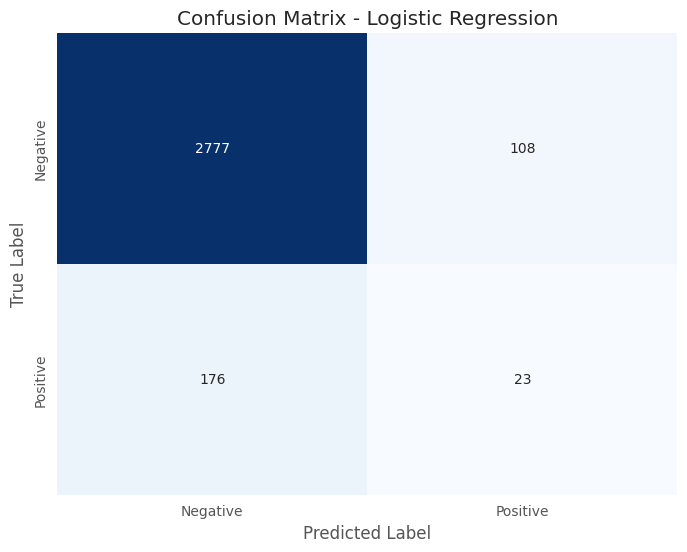

In [ ]:
# Calculate confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, (best_lr_model.predict_proba(X_test)[:, 1] > 0.1).astype(int))

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

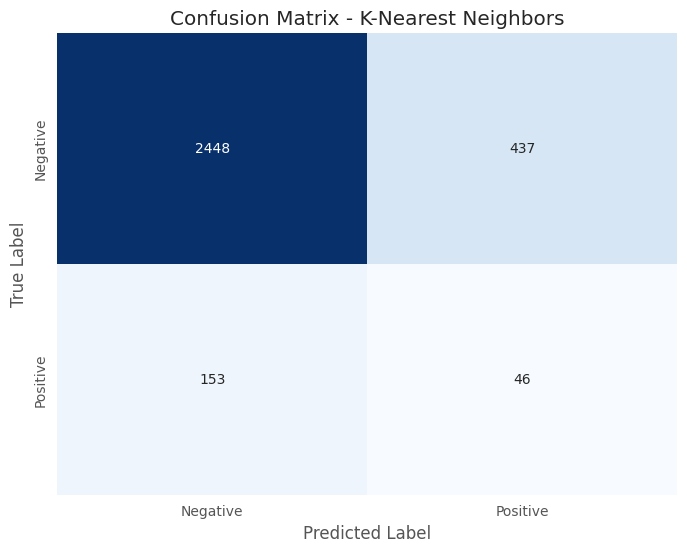

In [ ]:
# Calculate confusion matrix for K-Nearest Neighbors
cm_knn = confusion_matrix(y_test, (best_knn_model.predict_proba(X_test)[:, 1] > 0.1).astype(int))

# Plot confusion matrix for K-Nearest Neighbors
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Define ADASYN resampler
adasyn = ADASYN(random_state=42)

# Resample the training data using ADASYN
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Initialize Logistic Regression and K-Nearest Neighbors classifiers
lr_classifier = LogisticRegression()
knn_classifier = KNeighborsClassifier()

# Fit Logistic Regression and K-Nearest Neighbors models on resampled data
lr_classifier.fit(X_train_resampled, y_train_resampled)
knn_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
lr_y_pred = lr_classifier.predict(X_test)
knn_y_pred = knn_classifier.predict(X_test)

# Calculate probabilities for AUC calculation
lr_y_pred_proba = lr_classifier.predict_proba(X_test)[:, 1]
knn_y_pred_proba = knn_classifier.predict_proba(X_test)[:, 1]

# Calculate metrics for Logistic Regression
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_recall = recall_score(y_test, lr_y_pred)
lr_precision = precision_score(y_test, lr_y_pred)
lr_auc_score = roc_auc_score(y_test, lr_y_pred_proba)

# Calculate metrics for K-Nearest Neighbors
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_recall = recall_score(y_test, knn_y_pred)
knn_precision = precision_score(y_test, knn_y_pred)
knn_auc_score = roc_auc_score(y_test, knn_y_pred_proba)

# Create a DataFrame to compare metrics
metrics_data = {
    'Logistic Regression': [lr_accuracy, lr_recall, lr_precision, lr_auc_score],
    'K-Nearest Neighbors': [knn_accuracy, knn_recall, knn_precision, knn_auc_score]
}

metrics_df = pd.DataFrame(metrics_data, index=['Accuracy', 'Recall', 'Precision', 'AUC Score'])

# Print the DataFrame
print("Metrics after using ADASYN:")
print(metrics_df)

Metrics after using ADASYN:
           Logistic Regression  K-Nearest Neighbors
Accuracy                  0.77                 0.73
Recall                    0.57                 0.35
Precision                 0.15                 0.09
AUC Score                 0.78                 0.57


#### Hyperparameter Tuning after ADASYN Resampling

In [ ]:
X_train_resampled.columns

Index(['AccidentArea', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'Make', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PoliceReportFiled', 'WitnessPresent',
       'VehiclePrice', 'AgentType', 'AddressChange_Claim',
       'PastNumberOfClaims', 'NumberOfSuppliments', 'NumberOfCars', 'Year',
       'BasePolicy', 'Month', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'RepNumber',
       'Deductible'],
      dtype='object')

In [ ]:
# Define parameter grid for Logistic Regression
lr_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Define parameter grid for K-Nearest Neighbors
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Initialize GridSearchCV for Logistic Regression
lr_grid_search = GridSearchCV(LogisticRegression(), lr_param_grid, cv=5, scoring='roc_auc')

# Initialize GridSearchCV for K-Nearest Neighbors
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='roc_auc')

# Perform grid search for Logistic Regression
lr_grid_search.fit(X_train_resampled, y_train_resampled)

# Perform grid search for K-Nearest Neighbors
knn_grid_search.fit(X_train_resampled, y_train_resampled)

# Get best hyperparameters for Logistic Regression
best_lr_params = lr_grid_search.best_params_

# Get best hyperparameters for K-Nearest Neighbors
best_knn_params = knn_grid_search.best_params_

print("Best hyperparameters for Logistic Regression:", best_lr_params)
print("Best hyperparameters for K-Nearest Neighbors:", best_knn_params)


Best hyperparameters for Logistic Regression: {'C': 1, 'penalty': 'l2'}
Best hyperparameters for K-Nearest Neighbors: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}


In [ ]:
## Retraining the Model & Evaluating
# Initialize Logistic Regression and K-Nearest Neighbors classifiers with best hyperparameters
best_lr_classifier = LogisticRegression(**best_lr_params)
best_knn_classifier = KNeighborsClassifier(**best_knn_params)

# Retrain Logistic Regression and K-Nearest Neighbors models with best hyperparameters
best_lr_classifier.fit(X_train_resampled, y_train_resampled)
best_knn_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
best_lr_y_pred = best_lr_classifier.predict(X_test)
best_knn_y_pred = best_knn_classifier.predict(X_test)

# Calculate probabilities for AUC calculation
best_lr_y_pred_proba = best_lr_classifier.predict_proba(X_test)[:, 1]
best_knn_y_pred_proba = best_knn_classifier.predict_proba(X_test)[:, 1]

# Calculate metrics for Logistic Regression after hyperparameter tuning
best_lr_accuracy = accuracy_score(y_test, best_lr_y_pred)
best_lr_recall = recall_score(y_test, best_lr_y_pred)
best_lr_precision = precision_score(y_test, best_lr_y_pred)
best_lr_auc_score = roc_auc_score(y_test, best_lr_y_pred_proba)

# Calculate metrics for K-Nearest Neighbors after hyperparameter tuning
best_knn_accuracy = accuracy_score(y_test, best_knn_y_pred)
best_knn_recall = recall_score(y_test, best_knn_y_pred)
best_knn_precision = precision_score(y_test, best_knn_y_pred)
best_knn_auc_score = roc_auc_score(y_test, best_knn_y_pred_proba)

# Create a DataFrame to compare metrics after hyperparameter tuning
best_metrics_data = {
    'Logistic Regression': [best_lr_accuracy, best_lr_recall, best_lr_precision, best_lr_auc_score],
    'K-Nearest Neighbors': [best_knn_accuracy, best_knn_recall, best_knn_precision, best_knn_auc_score]
}

best_metrics_df = pd.DataFrame(best_metrics_data, index=['Accuracy', 'Recall', 'Precision', 'AUC Score'])

# Print the DataFrame
print("Metrics after hyperparameter tuning:")
print(best_metrics_df)


Metrics after hyperparameter tuning:
           Logistic Regression  K-Nearest Neighbors
Accuracy                  0.77                 0.71
Recall                    0.57                 0.41
Precision                 0.15                 0.10
AUC Score                 0.78                 0.64


#### Plotting the AUC Scores

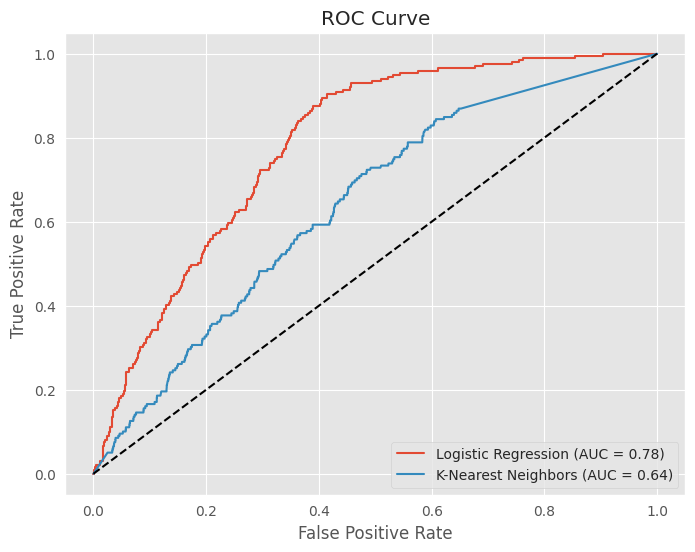

In [ ]:
from sklearn.metrics import roc_curve

# Calculate ROC curves for Logistic Regression and K-Nearest Neighbors
lr_fpr, lr_tpr, _ = roc_curve(y_test, best_lr_y_pred_proba)
knn_fpr, knn_tpr, _ = roc_curve(y_test, best_knn_y_pred_proba)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (AUC = {:.2f})'.format(best_lr_auc_score))
plt.plot(knn_fpr, knn_tpr, label='K-Nearest Neighbors (AUC = {:.2f})'.format(best_knn_auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

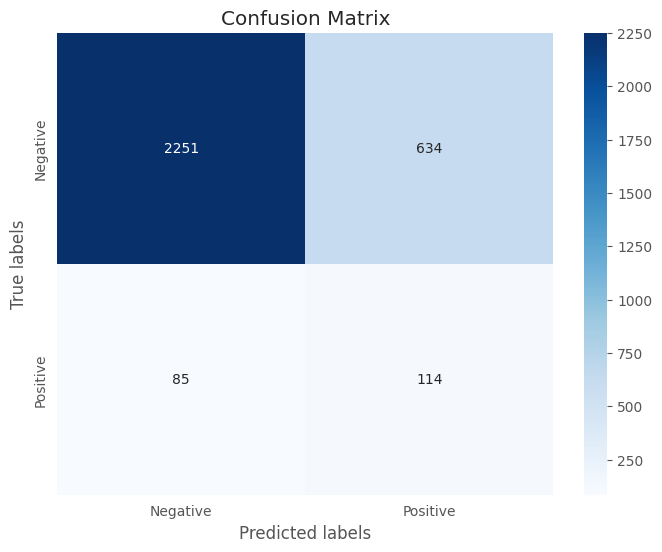

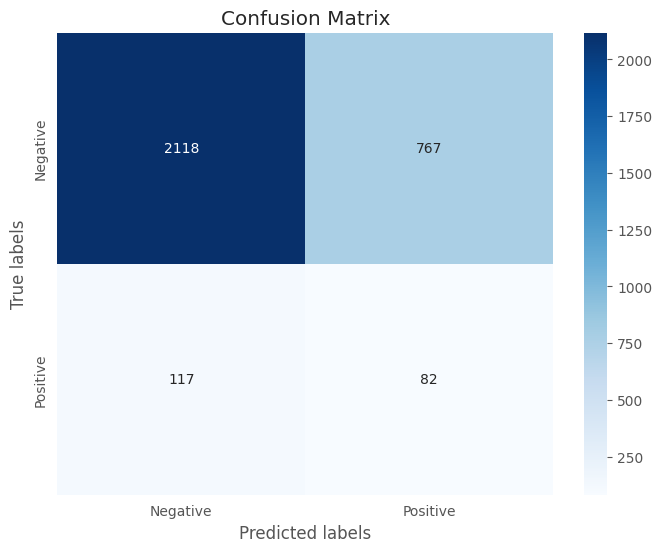

In [ ]:
# Define function to plot confusion matrix
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Calculate confusion matrices for Logistic Regression and K-Nearest Neighbors
lr_cm = confusion_matrix(y_test, best_lr_y_pred)
knn_cm = confusion_matrix(y_test, best_knn_y_pred)

# Plot confusion matrices
plot_confusion_matrix(lr_cm, ['Negative', 'Positive'])
plot_confusion_matrix(knn_cm, ['Negative', 'Positive'])

In [ ]:
# Check column names in the training data
print("Column names in the training data:")
print(X_train.columns)

Column names in the training data:
Index(['AccidentArea', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'Make', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PoliceReportFiled', 'WitnessPresent',
       'VehiclePrice', 'AgentType', 'AddressChange_Claim',
       'PastNumberOfClaims', 'NumberOfSuppliments', 'NumberOfCars', 'Year',
       'BasePolicy', 'Month', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'RepNumber',
       'Deductible'],
      dtype='object')


In [ ]:
# Check column names in the test data
print("Column names in the test data:")
print(X_test.columns)

Column names in the test data:
Index(['AccidentArea', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'Make', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PoliceReportFiled', 'WitnessPresent',
       'VehiclePrice', 'AgentType', 'AddressChange_Claim',
       'PastNumberOfClaims', 'NumberOfSuppliments', 'NumberOfCars', 'Year',
       'BasePolicy', 'Month', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'RepNumber',
       'Deductible'],
      dtype='object')


In [ ]:
# Assuming 'X_train' is your training data DataFrame and 'X_test' is your test data DataFrame

# Get sets of column names for training and test data
train_columns = set(X_train.columns)
test_columns = set(X_test.columns)

# Check for any differences
difference = train_columns.symmetric_difference(test_columns)

if len(difference) == 0:
    print("The column names in the training data and the test data are identical.")
else:
    print("There are differences in column names between the training data and the test data:")
    print("Columns present in the training data but not in the test data:", train_columns - test_columns)
    print("Columns present in the test data but not in the training data:", test_columns - train_columns)

The column names in the training data and the test data are identical.


In [ ]:
X_train.columns

Index(['AccidentArea', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'Make', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PoliceReportFiled', 'WitnessPresent',
       'VehiclePrice', 'AgentType', 'AddressChange_Claim',
       'PastNumberOfClaims', 'NumberOfSuppliments', 'NumberOfCars', 'Year',
       'BasePolicy', 'Month', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'RepNumber',
       'Deductible'],
      dtype='object')



```
# This is formatted as code
```

#### Save the model for Deployment

In [ ]:
X_train.columns

Index(['AccidentArea', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'Make', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PoliceReportFiled', 'WitnessPresent',
       'VehiclePrice', 'AgentType', 'AddressChange_Claim',
       'PastNumberOfClaims', 'NumberOfSuppliments', 'NumberOfCars', 'Year',
       'BasePolicy', 'Month', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'RepNumber',
       'Deductible'],
      dtype='object')

In [ ]:
best_lr_classifier
classifier = LogisticRegression(C=1, penalty='l2')
classifier.fit(X_train, y_train)


LogisticRegression(C=1)

In [ ]:
X_train_resampled.columns

Index(['AccidentArea', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'Make', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PoliceReportFiled', 'WitnessPresent',
       'VehiclePrice', 'AgentType', 'AddressChange_Claim',
       'PastNumberOfClaims', 'NumberOfSuppliments', 'NumberOfCars', 'Year',
       'BasePolicy', 'Month', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'RepNumber',
       'Deductible'],
      dtype='object')

In [ ]:
# Save the trained model as a pickle string.
#classifier = best_lr_classifier
import pickle
filename = 'LR2_trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

#Loading saved model
loaded_model = pickle.load(open('LR2_trained_model.sav', 'rb'))

loaded_model.predict(X_test)
loaded_model.predict_proba(X_test)


array([[0.87502915, 0.12497085],
       [0.99282613, 0.00717387],
       [0.85783907, 0.14216093],
       ...,
       [0.95801319, 0.04198681],
       [0.98641515, 0.01358485],
       [0.95012083, 0.04987917]])

Since the Logistic Regression has the highest recall with a decent AUC score, we will proceed to do hyperparameter tuning of the model to improve its performance.

#### Hyper-parameter tuning for logistic regression model[link text](https://)

In [ ]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'RepNumber', 'Deductible',
       'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [ ]:
X_train.columns

Index(['AccidentArea', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'Make', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PoliceReportFiled', 'WitnessPresent',
       'VehiclePrice', 'AgentType', 'AddressChange_Claim',
       'PastNumberOfClaims', 'NumberOfSuppliments', 'NumberOfCars', 'Year',
       'BasePolicy', 'Month', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'RepNumber',
       'Deductible'],
      dtype='object')

No overfitting of the model is observed as the mean CV score for the train set is slightly lower than the recall score on the test set.



### Feature Importance

From the above plots, the top 6 features that contribute to the prediction of a fraud case are:

AccidentArea_urban,
Sex_Male,
Fault_Third Party,
Police_report_filed_yes,
Witness_present_yes,
AgentType_Internal

In [ ]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'RepNumber', 'Deductible',
       'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

#### Finally , save the classifier model for future deployment.

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pickle

# Initialize a dictionary to store the encoders
encoders = {}

# Example columns for demonstration; replace with your actual DataFrame and columns
df_categorical = df[['AccidentArea', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'Make','DriverRating',
                     'Days_Policy_Accident', 'Days_Policy_Claim', 'PoliceReportFiled', 'WitnessPresent','VehiclePrice',
                     'AgentType', 'AddressChange_Claim', 'PastNumberOfClaims','NumberOfSuppliments','NumberOfCars', 'Year',
                     'BasePolicy', 'Month', 'AgeOfVehicle','AgeOfPolicyHolder']].copy()

# Apply LabelEncoder to each categorical column and save the encoder
for column in df_categorical.columns:
    le = LabelEncoder()
    df_categorical[column] = le.fit_transform(df_categorical[column])
    encoders[column] = le

# Save the encoders to a file
filename = 'encoder.sav'
pickle.dump(encoders, open(filename, 'wb'))

print("Encoders saved successfully in 'encoder.sav'!")


Encoders saved successfully in 'encoder.sav'!


In [ ]:
X_train.columns

Index(['AccidentArea', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'Make', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PoliceReportFiled', 'WitnessPresent',
       'VehiclePrice', 'AgentType', 'AddressChange_Claim',
       'PastNumberOfClaims', 'NumberOfSuppliments', 'NumberOfCars', 'Year',
       'BasePolicy', 'Month', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'RepNumber',
       'Deductible'],
      dtype='object')

### Deployment of the Model

In [ ]:
#pip install streamlit

In [ ]:
# import streamlit as st
# import pickle

In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.19.13.86


In [ ]:
%%writefile app.py

Overwriting app.py


In [ ]:
#! streamlit run app.py & npx localtunnel --port 8501

In [ ]:
# Load the trained model
# loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [ ]:
df_copy.PolicyType.unique()

array(['Sport - Liability', 'Sport - Collision', 'Sedan - Liability',
       'Utility - All Perils', 'Sedan - All Perils', 'Sedan - Collision',
       'Utility - Collision', 'Utility - Liability', 'Sport - All Perils'],
      dtype=object)

In [ ]:
df_copy.PolicyType.unique()

for i in df_copy.columns:
  print(i,df_copy[i].unique())

Month ['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']
WeekOfMonth [5 3 2 4 1]
DayOfWeek ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']
Make ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']
AccidentArea ['Urban' 'Rural']
DayOfWeekClaimed ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']
MonthClaimed ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']
WeekOfMonthClaimed [1 4 2 3 5]
Sex ['Female' 'Male']
MaritalStatus ['Single' 'Married' 'Widow' 'Divorced']
Age [21 34 47 65 27 20 36  0 30 42 71 52 28 61 38 41 32 40 63 31 45 60 39 55
 35 44 72 29 37 59 49 50 26 48 64 33 74 23 25 56 16 68 18 51 22 53 46 43
 57 54 69 67 19 78 77 75 80 58 73 24 76 62 79 70 17 66]
Fault ['Policy Holder' 'Third Party']
PolicyType ['Sport - Liability' 'Sport - Collision' 'Sedan - Liability'


In [ ]:
import os
import pickle
from sklearn.preprocessing import LabelEncoder

def save_encoders_separately(df, categorical_columns, save_directory='encoders'):
    """
    Encodes the categorical columns in the dataframe and saves each encoder as a separate file.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        categorical_columns (list): List of categorical column names to encode.
        save_directory (str): Directory where the encoder files will be saved. Defaults to 'encoders'.
    """
    # Ensure the save directory exists
    if not os.path.exists(save_directory):
        os.makedirs(save_directory)

    # Loop through each categorical column, encode it, and save the encoder
    for column in categorical_columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

        # Define the filename for the encoder
        filename = os.path.join(save_directory, f'{column}_encoder.sav')

        # Save the encoder
        with open(filename, 'wb') as f:
            pickle.dump(le, f)

        print(f"Encoder for '{column}' saved as '{filename}'")

# Example usage:
categorical_columns = ['AccidentArea', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
                       'VehicleCategory', 'Days_Policy_Accident', 'Days_Policy_Claim',
                       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
                       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy','VehiclePrice', 'Deductible', 'DriverRating', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'NumberOfSuppliments', 'Month',
       'WeekOfMonth', 'DayOfWeek', 'Make', 'DayOfWeekClaimed', 'MonthClaimed',
       'WeekOfMonthClaimed', 'RepNumber']

# Assuming df is your DataFrame with categorical data
save_encoders_separately(df, categorical_columns)

Encoder for 'AccidentArea' saved as 'encoders/AccidentArea_encoder.sav'
Encoder for 'Sex' saved as 'encoders/Sex_encoder.sav'
Encoder for 'MaritalStatus' saved as 'encoders/MaritalStatus_encoder.sav'
Encoder for 'Fault' saved as 'encoders/Fault_encoder.sav'
Encoder for 'PolicyType' saved as 'encoders/PolicyType_encoder.sav'
Encoder for 'VehicleCategory' saved as 'encoders/VehicleCategory_encoder.sav'
Encoder for 'Days_Policy_Accident' saved as 'encoders/Days_Policy_Accident_encoder.sav'
Encoder for 'Days_Policy_Claim' saved as 'encoders/Days_Policy_Claim_encoder.sav'
Encoder for 'PoliceReportFiled' saved as 'encoders/PoliceReportFiled_encoder.sav'
Encoder for 'WitnessPresent' saved as 'encoders/WitnessPresent_encoder.sav'
Encoder for 'AgentType' saved as 'encoders/AgentType_encoder.sav'
Encoder for 'AddressChange_Claim' saved as 'encoders/AddressChange_Claim_encoder.sav'
Encoder for 'NumberOfCars' saved as 'encoders/NumberOfCars_encoder.sav'
Encoder for 'Year' saved as 'encoders/Year_e

In [ ]:
import pandas as pd

# Create a DataFrame with the dummy data
data = {
    'AccidentArea': ['Urban', 'Rural', 'Urban', 'Suburban', 'Urban'],
    'Sex': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'MaritalStatus': ['Single', 'Married', 'Single', 'Single', 'Married'],
    'Fault': ['Policy Holder', 'Third Party', 'Policy Holder', 'Policy Holder', 'Third Party'],
    'PolicyType': ['SUV - All Perils', 'Sedan - Third Party', 'SUV - All Perils', 'Truck - Full Coverage', 'SUV - All Perils'],
    'VehicleCategory': ['Economy', 'SUV', 'Sedan', 'Truck', 'Economy'],
    'Days_Policy_Accident': [0, 5, 2, 1, 3],
    'Days_Policy_Claim': [0, 3, 1, 0, 2],
    'PoliceReportFiled': ['Yes', 'No', 'Yes', 'Yes', 'No'],
    'WitnessPresent': ['No', 'Yes', 'Yes', 'No', 'Yes'],
    'AgentType': ['Internal', 'External', 'Internal', 'External', 'Internal'],
    'AddressChange_Claim': ['yes', 'no', 'yes', 'no', 'yes'],
    'NumberOfCars': [1, 2, 1, 3, 2],
    'Year': [2020, 2019, 2021, 2018, 2020],
    'BasePolicy': ['Comprehensive', 'Third Party', 'Liability', 'Comprehensive', 'Third Party']
}

df = pd.DataFrame(data)
df.to_excel('dummy_data.xlsx', index=False)


In [ ]:
df.to_excel('dummy_data.xlsx', index=False)